<a href="https://colab.research.google.com/github/roroanya/Predicted-Used-Car-Prices-With-Machine-Learning/blob/main/Used_Car_Prediction_GDGOC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Data Preparation
Here goes EDA, DATA Preprocessing and Feature engineering

##EDA

Memahami data dari awal dari segi statistik nya, karakteristik data nya, tren dan pola data nya.

Further references : https://docs.google.com/presentation/d/1P-yXwal4BvNjELxeOdsquXRAg3EXDjBE/edit?usp=sharing&ouid=111794804156151213377&rtpof=true&sd=true

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
!gdown --id 1kRjo7M6AbUm320kcnDHuXrPNEuETYsUi -O second_hand_cars_price.csv

/usr/local/lib/python3.11/dist-packages/gdown/__main__.py:140: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From: https://drive.google.com/uc?id=1kRjo7M6AbUm320kcnDHuXrPNEuETYsUi
To: /content/second_hand_cars_price.csv
100% 7.26k/7.26k [00:00<00:00, 11.7MB/s]


In [ ]:
df = pd.read_csv('second_hand_cars_price.csv')
df.head()

,Car_ID,Brand,Model,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price
0,1,Toyota,Corolla,2018,50000,Petrol,Manual,First,15,1498,108,5,800000
1,2,Honda,Civic,2019,40000,Petrol,Automatic,Second,17,1597,140,5,1000000
2,3,Ford,Mustang,2017,20000,Petrol,Automatic,First,10,4951,395,4,2500000
3,4,Maruti,Swift,2020,30000,Diesel,Manual,Third,23,1248,74,5,600000
4,5,Hyundai,Sonata,2016,60000,Diesel,Automatic,Second,18,1999,194,5,850000


In [ ]:
# Variabel target yang ingin diprediksi adalah 'Price'
target_variable = 'Price'
y = df[target_variable]

In [ ]:
price_rows = df[df['Price'].notnull()]
print(price_rows.head())
print("Jumlah data dengan harga tersedia:", price_rows.shape[0])

   Car_ID    Brand    Model  Year  Kilometers_Driven Fuel_Type Transmission  \
0       1   Toyota  Corolla  2018              50000    Petrol       Manual   
1       2    Honda    Civic  2019              40000    Petrol    Automatic   
2       3     Ford  Mustang  2017              20000    Petrol    Automatic   
3       4   Maruti    Swift  2020              30000    Diesel       Manual   
4       5  Hyundai   Sonata  2016              60000    Diesel    Automatic   

  Owner_Type  Mileage  Engine  Power  Seats    Price  
0      First       15    1498    108      5   800000  
1     Second       17    1597    140      5  1000000  
2      First       10    4951    395      4  2500000  
3      Third       23    1248     74      5   600000  
4     Second       18    1999    194      5   850000  
Jumlah data dengan harga tersedia: 100


In [ ]:
df.head()

,Car_ID,Brand,Model,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price
0,1,Toyota,Corolla,2018,50000,Petrol,Manual,First,15,1498,108,5,800000
1,2,Honda,Civic,2019,40000,Petrol,Automatic,Second,17,1597,140,5,1000000
2,3,Ford,Mustang,2017,20000,Petrol,Automatic,First,10,4951,395,4,2500000
3,4,Maruti,Swift,2020,30000,Diesel,Manual,Third,23,1248,74,5,600000
4,5,Hyundai,Sonata,2016,60000,Diesel,Automatic,Second,18,1999,194,5,850000


In [ ]:
print("Bentuk dataset:", df.shape)

Bentuk dataset: (100, 13)


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Car_ID             100 non-null    int64 
 1   Brand              100 non-null    object
 2   Model              100 non-null    object
 3   Year               100 non-null    int64 
 4   Kilometers_Driven  100 non-null    int64 
 5   Fuel_Type          100 non-null    object
 6   Transmission       100 non-null    object
 7   Owner_Type         100 non-null    object
 8   Mileage            100 non-null    int64 
 9   Engine             100 non-null    int64 
 10  Power              100 non-null    int64 
 11  Seats              100 non-null    int64 
 12  Price              100 non-null    int64 
dtypes: int64(8), object(5)
memory usage: 10.3+ KB


In [ ]:
df.describe()

,Car_ID,Year,Kilometers_Driven,Mileage,Engine,Power,Seats,Price
count,100.000000,100.00000,100.000000,100.000000,100.000000,100.000000,100.000000,1.000000e+02
mean,50.500000,2018.39000,28150.000000,17.210000,1855.230000,158.130000,5.230000,1.574000e+06
std,29.011492,1.17116,9121.375716,3.309902,631.311475,76.968137,0.750151,1.000265e+06
min,1.000000,2016.00000,10000.000000,10.000000,999.000000,68.000000,4.000000,4.500000e+05
25%,25.750000,2017.75000,22000.000000,15.000000,1462.000000,103.000000,5.000000,7.000000e+05
50%,50.500000,2018.00000,27000.000000,17.000000,1774.000000,148.000000,5.000000,1.300000e+06
75%,75.250000,2019.00000,32000.000000,19.000000,2143.000000,187.000000,5.000000,2.500000e+06
max,100.000000,2021.00000,60000.000000,25.000000,4951.000000,396.000000,7.000000,4.000000e+06


In [ ]:
#Cek duplicate values
df.duplicated().sum()

np.int64(0)

In [ ]:
#Cek missing values
df.isnull().sum()

,0
Car_ID,0
Brand,0
Model,0
Year,0
Kilometers_Driven,0
Fuel_Type,0
Transmission,0
Owner_Type,0
Mileage,0
Engine,0


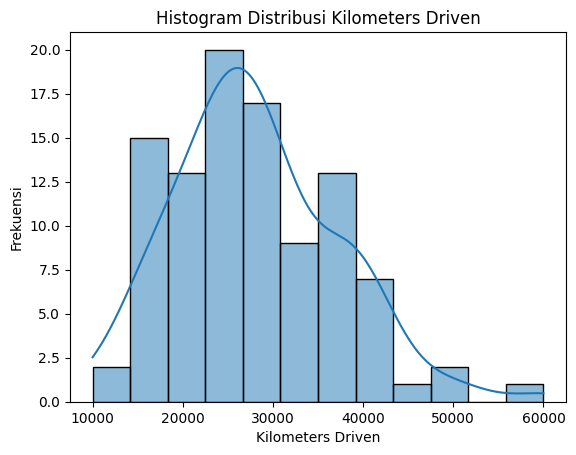

In [ ]:
sns.histplot(df['Kilometers_Driven'], kde=True)
plt.title("Histogram Distribusi Kilometers Driven")
plt.xlabel("Kilometers Driven")
plt.ylabel("Frekuensi")
plt.show()

if (df['Kilometers_Driven'] > 0).all():
    df['Kilometers_Driven_log'] = np.log(df['Kilometers_Driven'])
else:
    df['Kilometers_Driven_log'] = np.log(df['Kilometers_Driven'] + 1)

In [ ]:
df['Kilometers_Driven_log'].head()

,Kilometers_Driven_log
0,10.819778
1,10.596635
2,9.903488
3,10.308953
4,11.002100


In [ ]:
df.head()

,Car_ID,Brand,Model,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price,Kilometers_Driven_log
0,1,Toyota,Corolla,2018,50000,Petrol,Manual,First,15,1498,108,5,800000,10.819778
1,2,Honda,Civic,2019,40000,Petrol,Automatic,Second,17,1597,140,5,1000000,10.596635
2,3,Ford,Mustang,2017,20000,Petrol,Automatic,First,10,4951,395,4,2500000,9.903488
3,4,Maruti,Swift,2020,30000,Diesel,Manual,Third,23,1248,74,5,600000,10.308953
4,5,Hyundai,Sonata,2016,60000,Diesel,Automatic,Second,18,1999,194,5,850000,11.002100


In [ ]:
df.describe()

,Car_ID,Year,Kilometers_Driven,Mileage,Engine,Power,Seats,Price,Kilometers_Driven_log
count,100.000000,100.00000,100.000000,100.000000,100.000000,100.000000,100.000000,1.000000e+02,100.000000
mean,50.500000,2018.39000,28150.000000,17.210000,1855.230000,158.130000,5.230000,1.574000e+06,10.191837
std,29.011492,1.17116,9121.375716,3.309902,631.311475,76.968137,0.750151,1.000265e+06,0.335717
min,1.000000,2016.00000,10000.000000,10.000000,999.000000,68.000000,4.000000,4.500000e+05,9.210340
25%,25.750000,2017.75000,22000.000000,15.000000,1462.000000,103.000000,5.000000,7.000000e+05,9.998798
50%,50.500000,2018.00000,27000.000000,17.000000,1774.000000,148.000000,5.000000,1.300000e+06,10.202906
75%,75.250000,2019.00000,32000.000000,19.000000,2143.000000,187.000000,5.000000,2.500000e+06,10.373491
max,100.000000,2021.00000,60000.000000,25.000000,4951.000000,396.000000,7.000000,4.000000e+06,11.002100


In [ ]:
df.describe(include=['object', 'bool'])

,Brand,Model,Fuel_Type,Transmission,Owner_Type
count,100,100,100,100,100
unique,11,58,2,2,3
top,Ford,Mustang,Petrol,Automatic,First
freq,11,3,52,57,44


In [ ]:
df.shape

(100, 14)

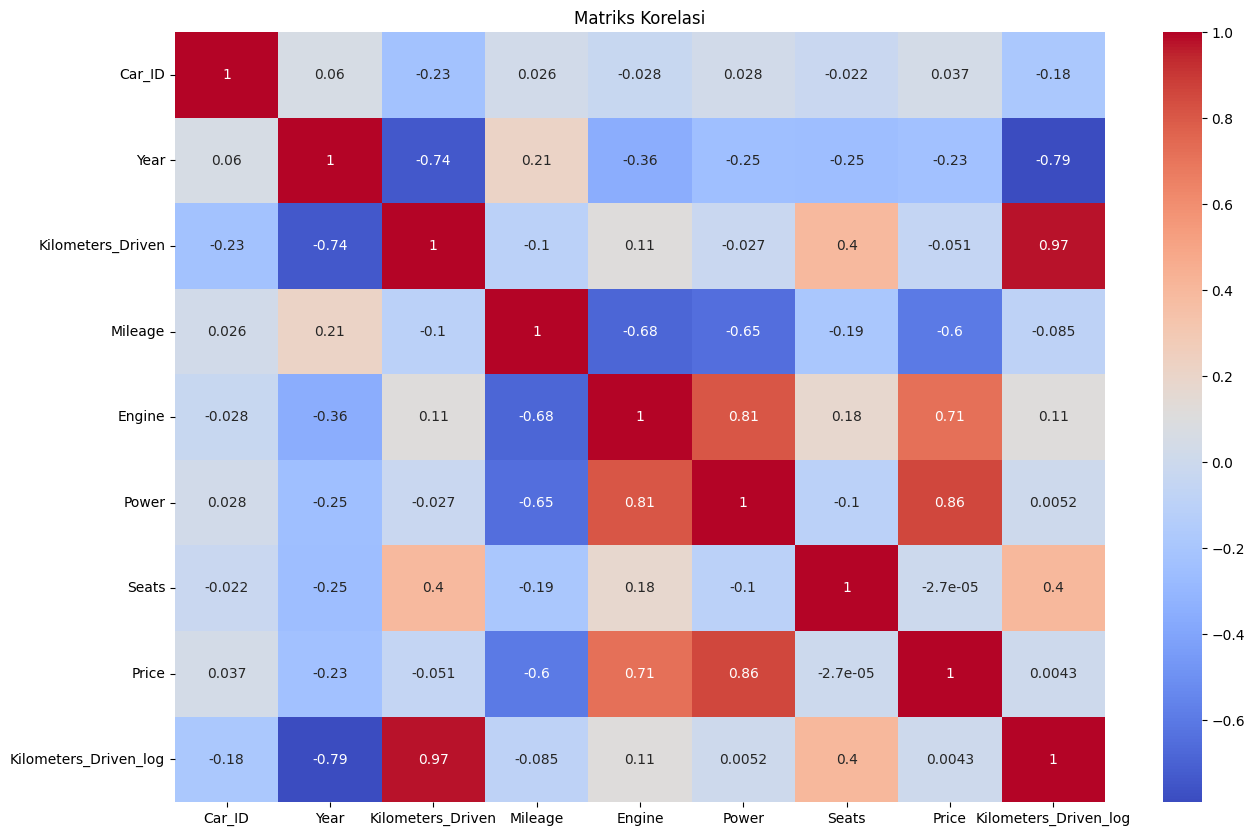

In [ ]:
#Bivariate Analysis
correlation_matrix = df.select_dtypes(include=[np.number]).corr()
plt.figure(figsize=(15, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Matriks Korelasi')
plt.show()

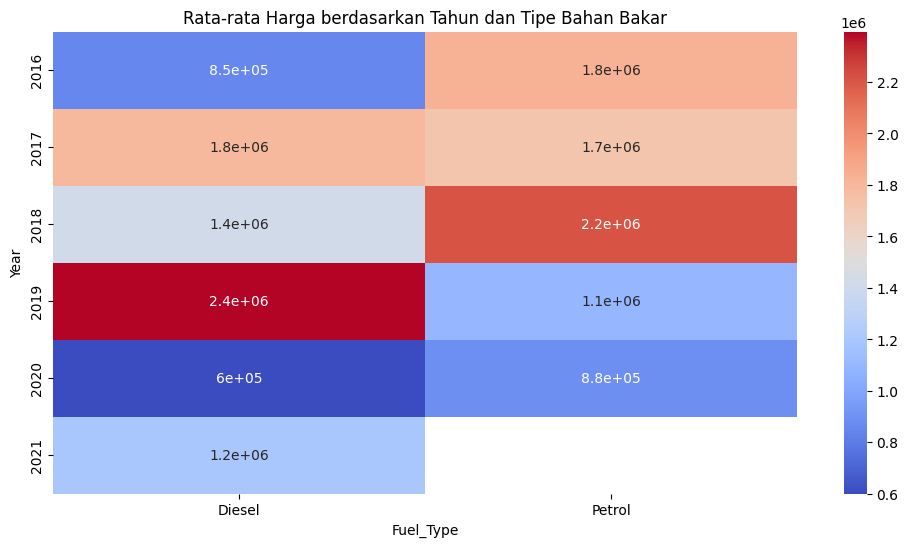

In [ ]:
#Multivariate Analysis
pivot_result = pd.pivot_table(data=df, index='Year', columns='Fuel_Type', values='Price')

plt.figure(figsize=(12, 6))
sns.heatmap(pivot_result, annot=True, cmap='coolwarm')
plt.title("Rata-rata Harga berdasarkan Tahun dan Tipe Bahan Bakar")
plt.show()

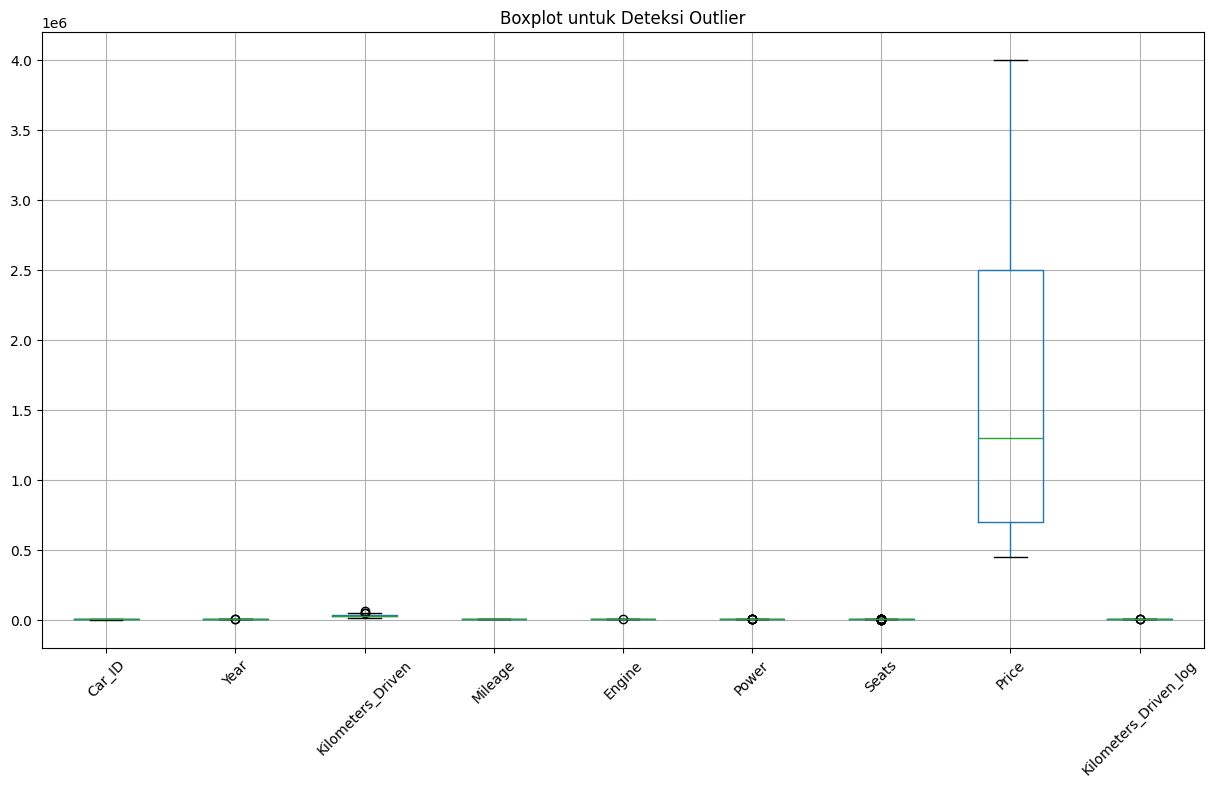

In [ ]:
#Boxplot untuk deteksi Outlier
numerical_columns = df.select_dtypes(include=[np.number]).columns

plt.figure(figsize=(15, 8))
df[numerical_columns].boxplot(rot=45)
plt.title("Boxplot untuk Deteksi Outlier")
plt.show()

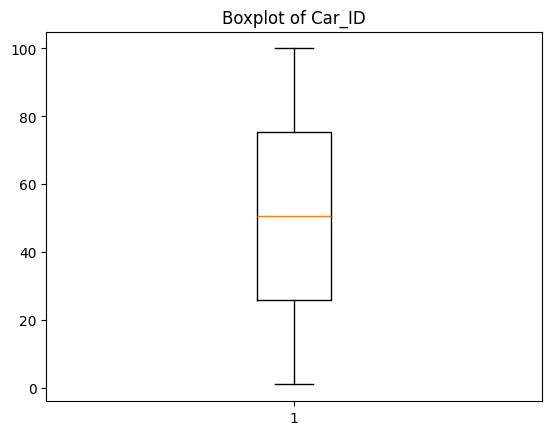

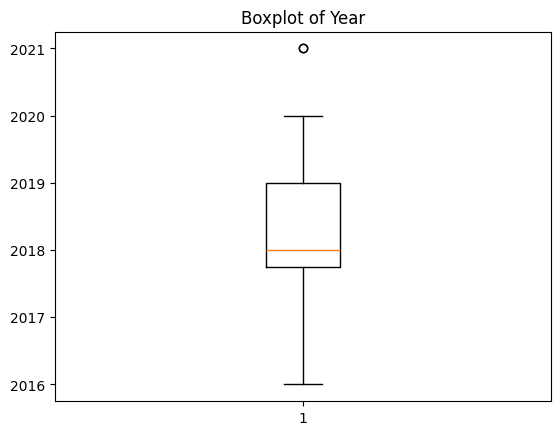

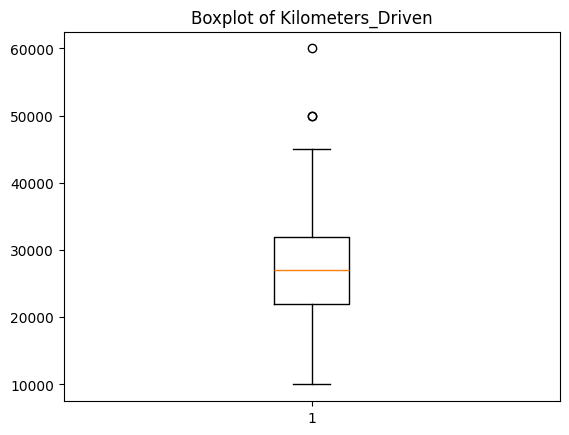

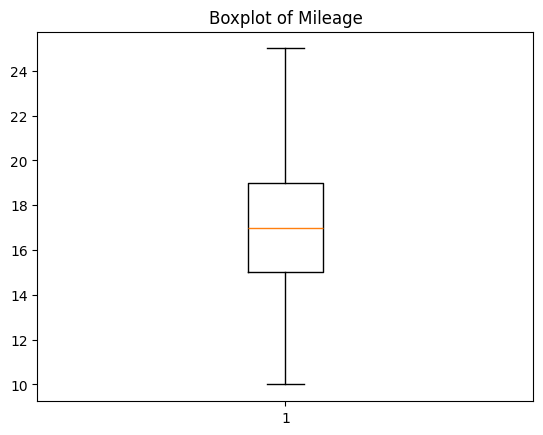

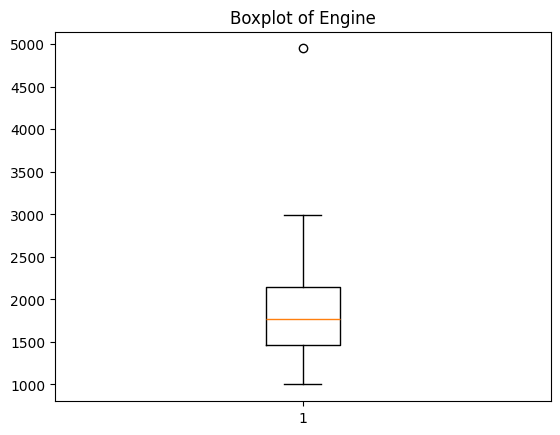

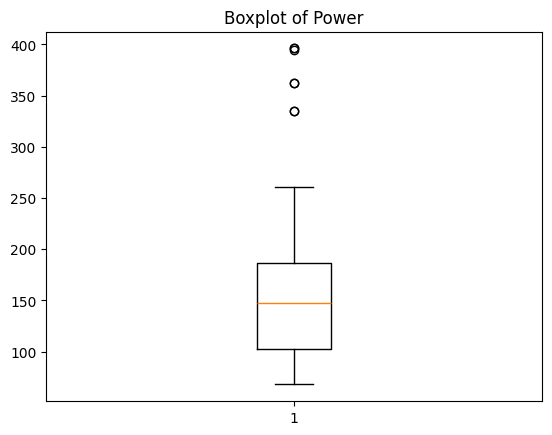

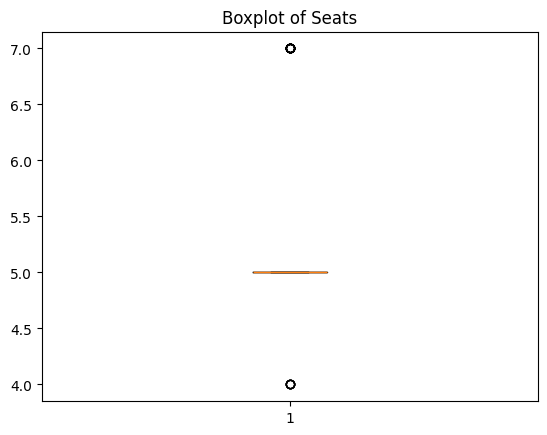

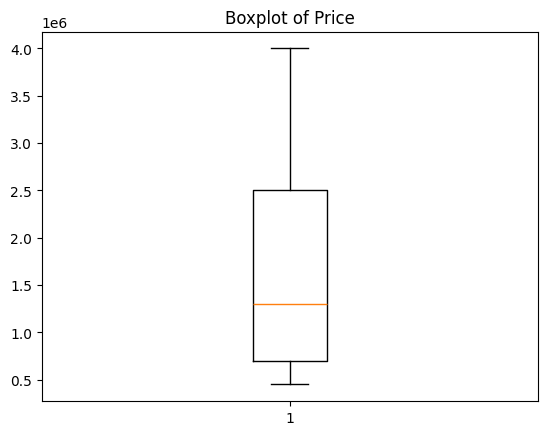

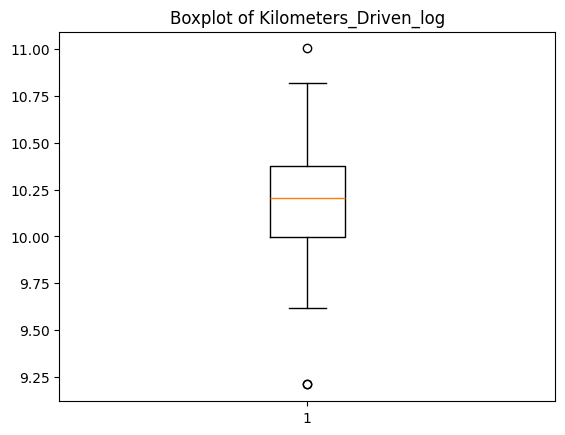

In [ ]:
#Boxplot
numerical_columns = df.select_dtypes(include=[np.number]).columns
for column in numerical_columns:
    plt.boxplot(df[column])
    plt.title(f"Boxplot of {column}")
    plt.show()

In [ ]:
outlier_features = []
for col in numerical_columns:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    if df[(df[col] < lower_bound) | (df[col] > upper_bound)].shape[0] > 0:
        outlier_features.append(col)

print("Fitur yang memiliki outlier:", outlier_features)

Fitur yang memiliki outlier: ['Year', 'Kilometers_Driven', 'Engine', 'Power', 'Seats', 'Kilometers_Driven_log']


In [ ]:
categorical_columns = df.select_dtypes(include=['object']).columns

for col in categorical_columns:
    print(f"Fitur '{col}' memiliki {df[col].nunique()} nilai unik")
    print("nilai:", df[col].unique()[:5])
    print("-" * 40)

Fitur 'Brand' memiliki 11 nilai unik
nilai: ['Toyota' 'Honda' 'Ford' 'Maruti' 'Hyundai']
----------------------------------------
Fitur 'Model' memiliki 58 nilai unik
nilai: ['Corolla' 'Civic' 'Mustang' 'Swift' 'Sonata']
----------------------------------------
Fitur 'Fuel_Type' memiliki 2 nilai unik
nilai: ['Petrol' 'Diesel']
----------------------------------------
Fitur 'Transmission' memiliki 2 nilai unik
nilai: ['Manual' 'Automatic']
----------------------------------------
Fitur 'Owner_Type' memiliki 3 nilai unik
nilai: ['First' 'Second' 'Third']
----------------------------------------


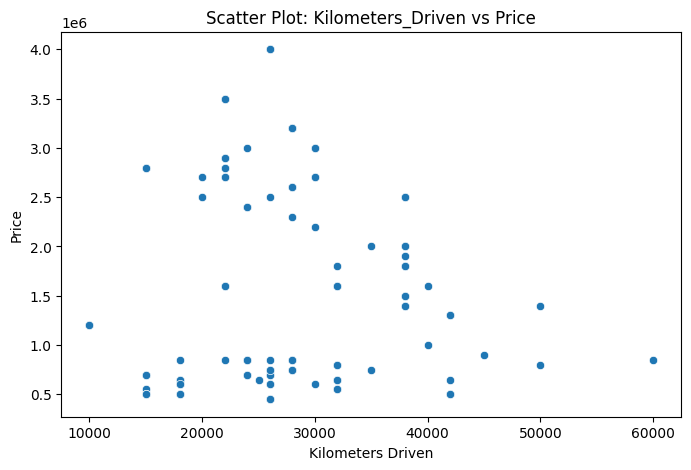

In [ ]:
plt.figure(figsize=(8, 5))
sns.scatterplot(x=df["Kilometers_Driven"], y=df["Price"])
plt.title("Scatter Plot: Kilometers_Driven vs Price")
plt.xlabel("Kilometers Driven")
plt.ylabel("Price")
plt.show()

Rata-rata harga berdasarkan Fuel Type dan Transmission:
  Fuel_Type Transmission         Price
0    Diesel    Automatic  2.258621e+06
1    Diesel       Manual  1.002632e+06
2    Petrol    Automatic  2.055357e+06
3    Petrol       Manual  6.375000e+05


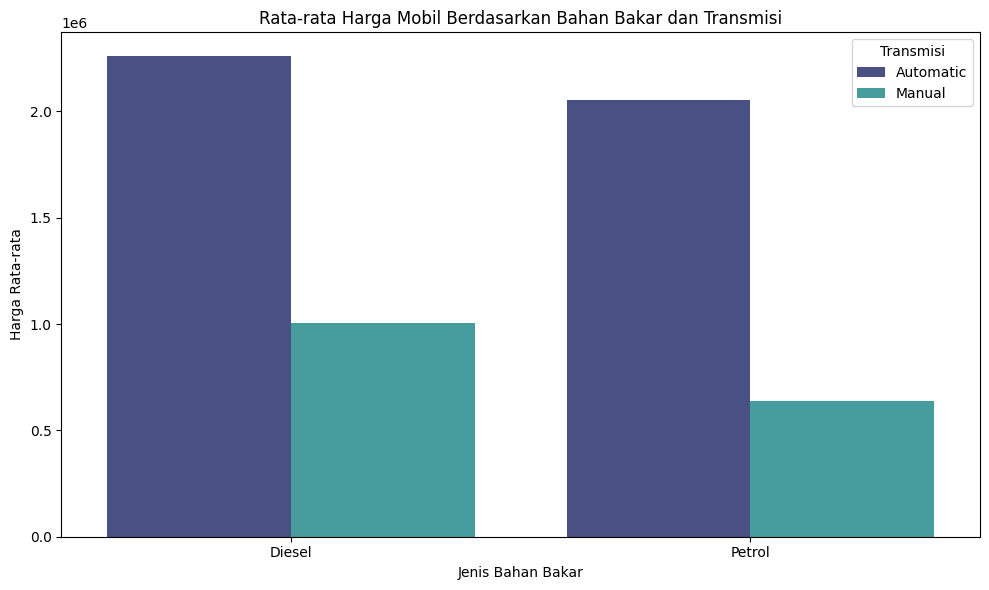

In [ ]:
# Filter data yang lengkap
df = df[df['Fuel_Type'].notnull() & df['Transmission'].notnull() & df['Price'].notnull()]

# Hitung rata-rata harga berdasarkan kombinasi Fuel_Type dan Transmission
avg_price_combo = df.groupby(['Fuel_Type', 'Transmission'])['Price'].mean().reset_index()

# Lihat hasil data
print("Rata-rata harga berdasarkan Fuel Type dan Transmission:")
print(avg_price_combo)

# Buat barplot
plt.figure(figsize=(10,6))
sns.barplot(x='Fuel_Type', y='Price', hue='Transmission', data=avg_price_combo, palette='mako')
plt.title('Rata-rata Harga Mobil Berdasarkan Bahan Bakar dan Transmisi')
plt.xlabel('Jenis Bahan Bakar')
plt.ylabel('Harga Rata-rata')
plt.legend(title='Transmisi')
plt.tight_layout()
plt.show()

##Data Preprocessing

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
!gdown --id 1kRjo7M6AbUm320kcnDHuXrPNEuETYsUi -O second_hand_cars_price.csv


/usr/local/lib/python3.11/dist-packages/gdown/__main__.py:140: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From: https://drive.google.com/uc?id=1kRjo7M6AbUm320kcnDHuXrPNEuETYsUi
To: /content/second_hand_cars_price.csv
100% 7.26k/7.26k [00:00<00:00, 19.1MB/s]


In [ ]:
df = pd.read_csv('second_hand_cars_price.csv')

In [ ]:
df.describe()

,Car_ID,Year,Kilometers_Driven,Mileage,Engine,Power,Seats,Price
count,100.000000,100.00000,100.000000,100.000000,100.000000,100.000000,100.000000,1.000000e+02
mean,50.500000,2018.39000,28150.000000,17.210000,1855.230000,158.130000,5.230000,1.574000e+06
std,29.011492,1.17116,9121.375716,3.309902,631.311475,76.968137,0.750151,1.000265e+06
min,1.000000,2016.00000,10000.000000,10.000000,999.000000,68.000000,4.000000,4.500000e+05
25%,25.750000,2017.75000,22000.000000,15.000000,1462.000000,103.000000,5.000000,7.000000e+05
50%,50.500000,2018.00000,27000.000000,17.000000,1774.000000,148.000000,5.000000,1.300000e+06
75%,75.250000,2019.00000,32000.000000,19.000000,2143.000000,187.000000,5.000000,2.500000e+06
max,100.000000,2021.00000,60000.000000,25.000000,4951.000000,396.000000,7.000000,4.000000e+06


In [ ]:
# Mengidentifikasi Mean-Median-Modus
print("Mean:", df['Price'].mean())
print("Median:", df['Price'].median())
print("Modus:", df['Price'].mode()[0])

Mean: 1574000.0
Median: 1300000.0
Modus: 850000


In [ ]:
##Handling Dirty Data
#Cek data duplikat
print("Jumlah duplikat:", df.duplicated().sum())

Jumlah duplikat: 0


In [ ]:
# Mengecek Missing Value
df.isnull().sum()

,0
Car_ID,0
Brand,0
Model,0
Year,0
Kilometers_Driven,0
Fuel_Type,0
Transmission,0
Owner_Type,0
Mileage,0
Engine,0


In [ ]:
categorical_features = [feature for feature in df.columns if df[feature].dtype == 'object']
print('The feature is',len(categorical_features))
print('The features are',categorical_features)

The feature is 5
The features are ['Brand', 'Model', 'Fuel_Type', 'Transmission', 'Owner_Type']


In [ ]:
#binary encoding (mengubah categorical ke numerical), karena menggunakan encoding binary membuat data lebih mudah diproses dan disimpan oleh perangkat digital
#menggunakan . map() to convert for fuel_type and transmission
#menggunakan .fillna(-1) untuk data yang missing

df = pd.read_csv('second_hand_cars_price.csv')

df["Brand"] = df["Brand"].astype("category").cat.codes
df["Model"] = df["Model"].astype("category").cat.codes
df["Fuel_Type"] = df["Fuel_Type"].map({'Petrol': 1, 'Diesel': 0}).fillna(-1).astype("int64")
df["Transmission"] = df["Transmission"].map({'Manual': 1, 'Automatic': 0}).fillna(-1).astype("int64")
df["Owner_Type"] = df["Owner_Type"].map({'First': 1, 'Second': 2, 'Third': 3}).fillna(-1).astype("int64")

In [ ]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   Car_ID             100 non-null    int64
 1   Brand              100 non-null    int8 
 2   Model              100 non-null    int8 
 3   Year               100 non-null    int64
 4   Kilometers_Driven  100 non-null    int64
 5   Fuel_Type          100 non-null    int64
 6   Transmission       100 non-null    int64
 7   Owner_Type         100 non-null    int64
 8   Mileage            100 non-null    int64
 9   Engine             100 non-null    int64
 10  Power              100 non-null    int64
 11  Seats              100 non-null    int64
 12  Price              100 non-null    int64
dtypes: int64(11), int8(2)
memory usage: 8.9 KB


In [ ]:
df.head(5)

,Car_ID,Brand,Model,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price
0,1,9,15,2018,50000,1,1,1,15,1498,108,5,800000
1,2,3,14,2019,40000,1,0,2,17,1597,140,5,1000000
2,3,2,30,2017,20000,1,0,1,10,4951,395,4,2500000
3,4,6,42,2020,30000,0,1,3,23,1248,74,5,600000
4,5,4,41,2016,60000,0,0,2,18,1999,194,5,850000


In [ ]:
#outlier detection using IQR, jadi yang ada outliernya Year, Kilometers_Driven, Engine, Power, Seats
Q1 = df.select_dtypes(include=[np.number]).quantile(0.25)
Q3 = df.select_dtypes(include=[np.number]).quantile(0.75)
IQR = Q3 - Q1

batas_bawah = Q1 - 1.5 * IQR
batas_atas = Q3 + 1.5 * IQR

outliers = df[(df.select_dtypes(include=[np.number]) < batas_bawah) | (df.select_dtypes(include=[np.number]) > batas_atas)]
print("Outlier berdasarkan IQR:")
print(outliers.sum())

Outlier berdasarkan IQR:
Car_ID                    0.0
Brand                     0.0
Model                     0.0
Year                   4042.0
Kilometers_Driven    160000.0
Fuel_Type                 0.0
Transmission              0.0
Owner_Type                0.0
Mileage                   0.0
Engine                 4951.0
Power                  2581.0
Seats                   118.0
Price                     0.0
dtype: float64


In [ ]:
df.dtypes

,0
Car_ID,int64
Brand,int8
Model,int8
Year,int64
Kilometers_Driven,int64
Fuel_Type,int64
Transmission,int64
Owner_Type,int64
Mileage,int64
Engine,int64


In [ ]:
# #Normalization and Data Scaling menggunakan Standard Scaler

# # transform Standard Scaler
# #from sklearn.preprocessing import StandardScaler
# #standard_scaler = StandardScaler()
# #df_standard = pd.DataFrame(standard_scaler.fit_transform(df.select_dtypes(include=[np.number])))
# #standardScaler_data = standard_scaler.transform(df.select_dtypes(include=[np.number]))
# #df_standard = pd.DataFrame(standardScaler_data, columns=df.select_dtypes(include=[np.number]).columns)

# import pandas as pd
# import numpy as np
# from sklearn.preprocessing import StandardScaler

# # 1. Pisahkan fitur numerik dan target
# X = df.drop(columns='Price')
# X_num = X.select_dtypes(include=np.number)
# y = df['Price']

# # 2. Inisialisasi Standard Scaler
# standard_scaler = StandardScaler()

# # 3. Fit dan transform data fitur
# X_standard = standard_scaler.fit_transform(X_num)

# # 4. Buat DataFrame baru dengan kolom asli
# df_standard = pd.DataFrame(X_standard, columns=X_num.columns)

# # 5. (Opsional) Jika ingin gabungkan kembali target 'price'
# df_standard['Price'] = y

In [ ]:
# df_standard.head(5)

In [ ]:
df.head(5)

,Car_ID,Brand,Model,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price
0,1,9,15,2018,50000,1,1,1,15,1498,108,5,800000
1,2,3,14,2019,40000,1,0,2,17,1597,140,5,1000000
2,3,2,30,2017,20000,1,0,1,10,4951,395,4,2500000
3,4,6,42,2020,30000,0,1,3,23,1248,74,5,600000
4,5,4,41,2016,60000,0,0,2,18,1999,194,5,850000


In [ ]:
# df = df_standard

In [ ]:
df.head(5)

,Car_ID,Brand,Model,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price
0,1,9,15,2018,50000,1,1,1,15,1498,108,5,800000
1,2,3,14,2019,40000,1,0,2,17,1597,140,5,1000000
2,3,2,30,2017,20000,1,0,1,10,4951,395,4,2500000
3,4,6,42,2020,30000,0,1,3,23,1248,74,5,600000
4,5,4,41,2016,60000,0,0,2,18,1999,194,5,850000


In [ ]:
# Cek skewness semua kolom numerik
numeric_cols = df.select_dtypes(include='number').columns
print("Skewness awal:")
print(df[numeric_cols].skew())

Skewness awal:
Car_ID               0.000000
Brand               -0.020040
Model               -0.017259
Year                 0.001243
Kilometers_Driven    0.621261
Fuel_Type           -0.081289
Transmission         0.287110
Owner_Type           0.499557
Mileage              0.372584
Engine               1.552714
Power                1.433279
Seats                1.644322
Price                0.614286
dtype: float64


In [ ]:
import numpy as np
# Menggunakan log transformation (np.log1p) untuk mengurangi skewness pada fitur numerik
# sehingga distribusi lebih simetris dan model dapat bekerja lebih optimal
df['Engine'] = np.log1p(df['Engine'])
df['Price'] = np.log1p(df['Price'])
df['Power'] = np.log1p(df['Power'])
df['Seats'] = np.log1p(df['Seats'])

In [ ]:
# Cek hasil setelah transform
print("Skewness setelah transformasi:")
print(df[['Engine', 'Power', 'Seats', 'Price']].skew())

Skewness setelah transformasi:
Engine    0.437656
Power     0.396618
Seats     1.382353
Price     0.088366
dtype: float64


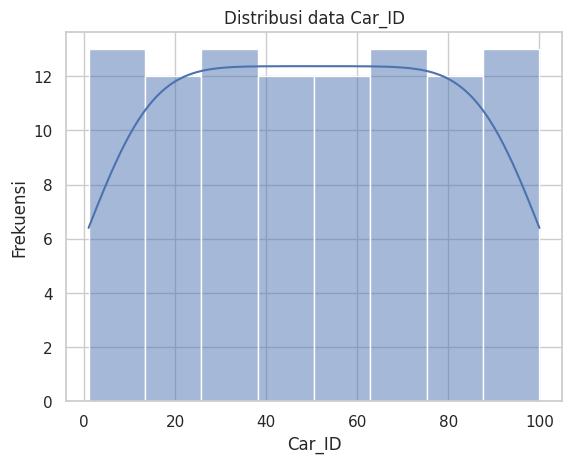

Skewness: 0.0000
Median: 50.5
Modus : 1
Mean  : 50.5
→ Distribusi data cenderung simetris (mendekati Gaussian).
--------------------------------------------------


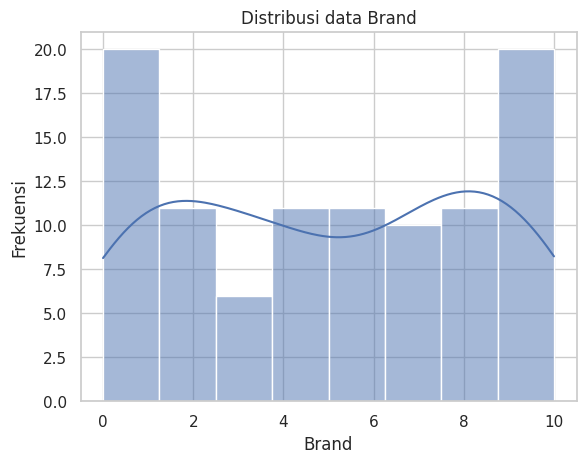

Skewness: -0.0200
Median: 5.0
Modus : 2
Mean  : 5.03
→ Distribusi data cenderung simetris (mendekati Gaussian).
--------------------------------------------------


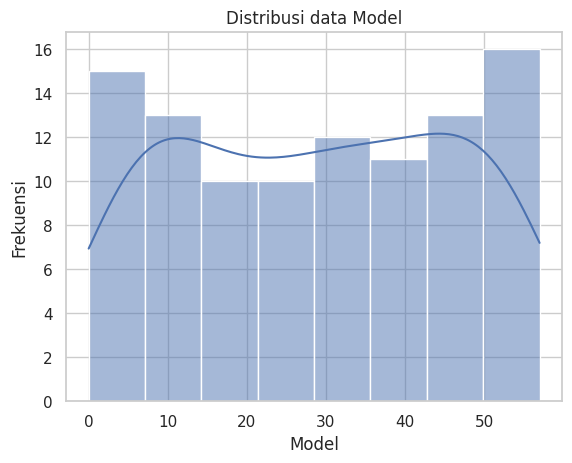

Skewness: -0.0173
Median: 29.5
Modus : 7
Mean  : 28.77
→ Distribusi data cenderung simetris (mendekati Gaussian).
--------------------------------------------------


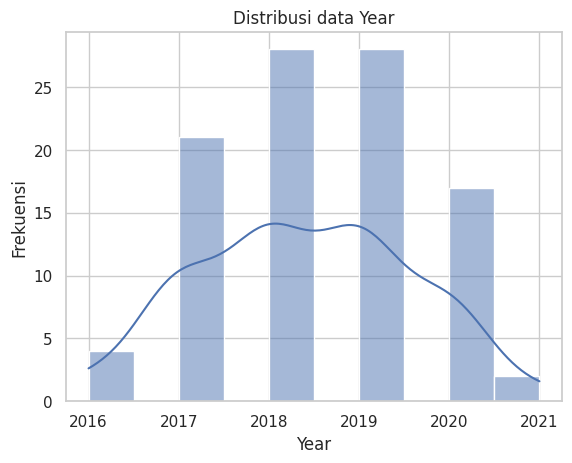

Skewness: 0.0012
Median: 2018.0
Modus : 2018
Mean  : 2018.39
→ Distribusi data cenderung simetris (mendekati Gaussian).
--------------------------------------------------


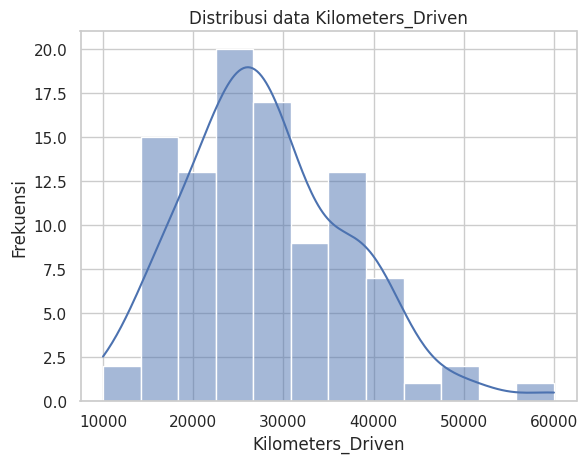

Skewness: 0.6213
Median: 27000.0
Modus : 26000
Mean  : 28150.0
→ Distribusi data cenderung right-skewed (positive skew).
--------------------------------------------------


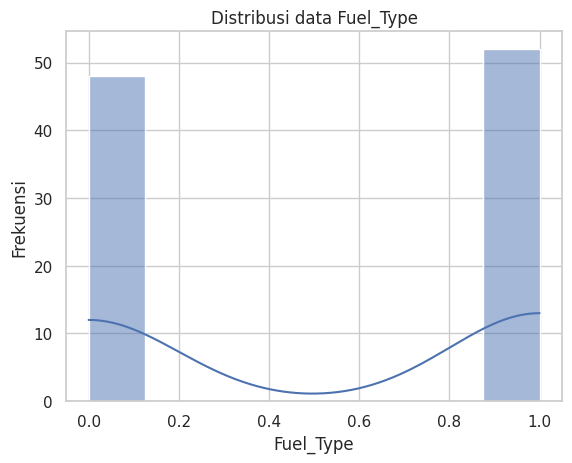

Skewness: -0.0813
Median: 1.0
Modus : 1
Mean  : 0.52
→ Distribusi data cenderung simetris (mendekati Gaussian).
--------------------------------------------------


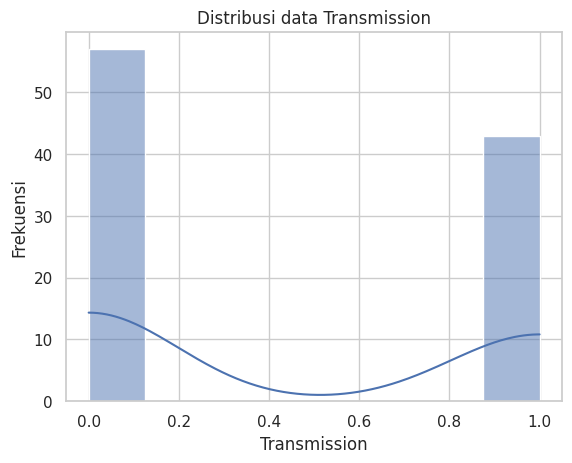

Skewness: 0.2871
Median: 0.0
Modus : 0
Mean  : 0.43
→ Distribusi data cenderung simetris (mendekati Gaussian).
--------------------------------------------------


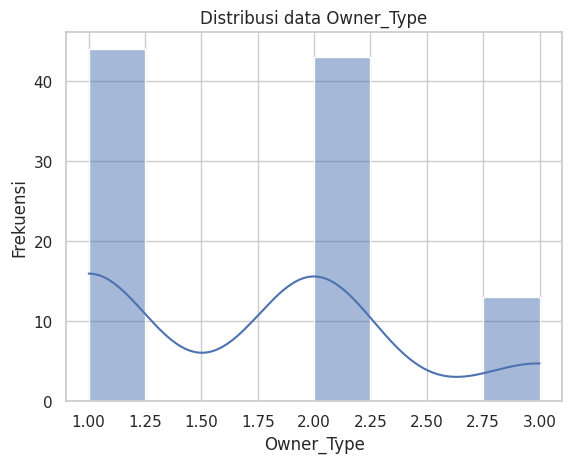

Skewness: 0.4996
Median: 2.0
Modus : 1
Mean  : 1.69
→ Distribusi data cenderung simetris (mendekati Gaussian).
--------------------------------------------------


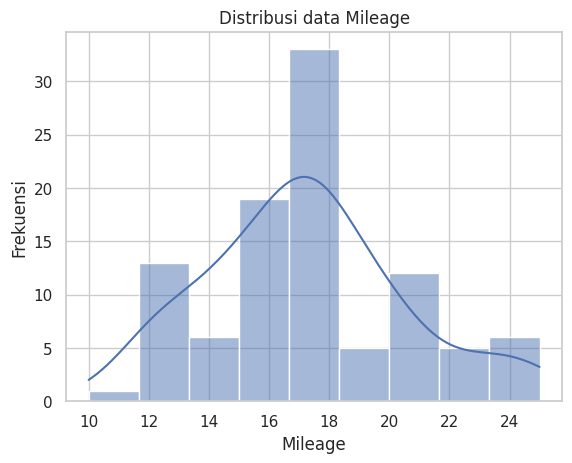

Skewness: 0.3726
Median: 17.0
Modus : 17
Mean  : 17.21
→ Distribusi data cenderung simetris (mendekati Gaussian).
--------------------------------------------------


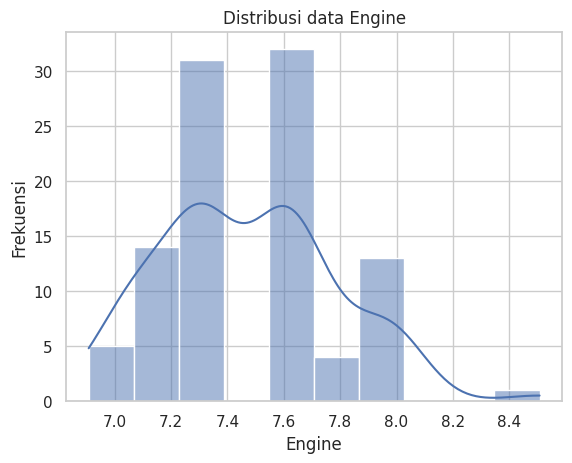

Skewness: 0.4377
Median: 7.476615526728533
Modus : 7.312553498102598
Mean  : 7.476337509924547
→ Distribusi data cenderung simetris (mendekati Gaussian).
--------------------------------------------------


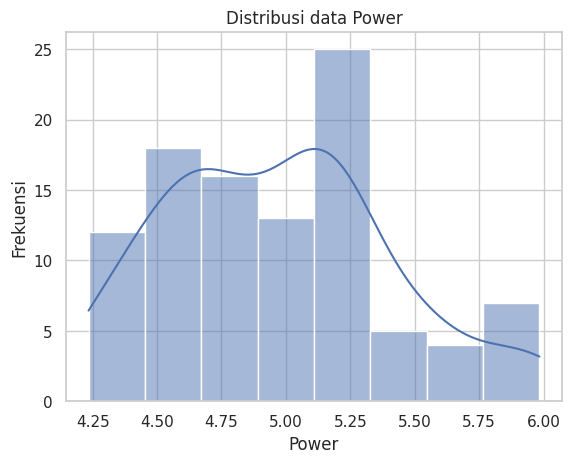

Skewness: 0.3966
Median: 5.003946305945459
Modus : 4.6443908991413725
Mean  : 4.970599671406976
→ Distribusi data cenderung simetris (mendekati Gaussian).
--------------------------------------------------


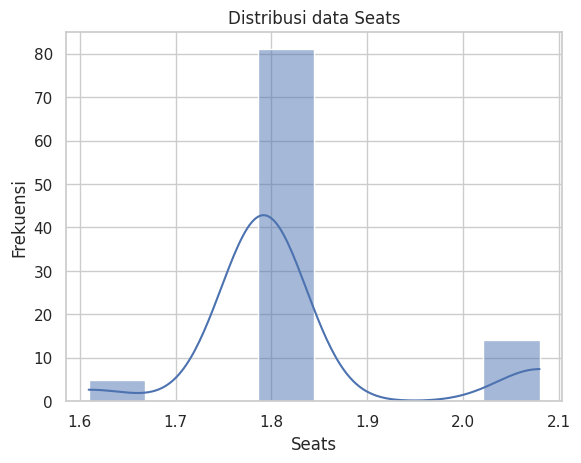

Skewness: 1.3824
Median: 1.791759469228055
Modus : 1.791759469228055
Mean  : 1.8229188815316064
→ Distribusi data cenderung right-skewed (positive skew).
--------------------------------------------------


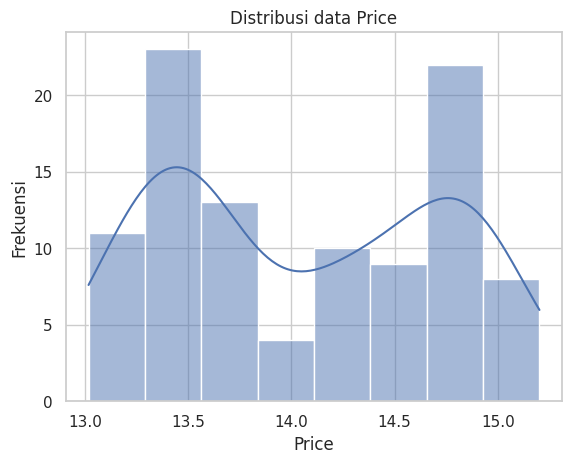

Skewness: 0.0884
Median: 14.077875591662238
Modus : 13.652992804936396
Mean  : 14.05632283656275
→ Distribusi data cenderung simetris (mendekati Gaussian).
--------------------------------------------------


In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Visualisasi distribusi semua fitur numerik setelah transformasi
numerical_cols = df.select_dtypes(include=np.number).columns

for i in numerical_cols:
    # Plot histogram dan KDE
    sns.histplot(df[i], kde=True)
    plt.title(f'Distribusi data {i}')
    plt.xlabel(i)
    plt.ylabel('Frekuensi')
    plt.show()

# Cek skewness
    skewness = df[i].skew()
    print(f'Skewness: {skewness:.4f}')

# Statistik deskriptif
    print("Median:", df[i].median())
    print("Modus :", df[i].mode()[0])
    print("Mean  :", df[i].mean())

# Interpretasi skew
    if skewness > 0.5:
        print('→ Distribusi data cenderung right-skewed (positive skew).')
    elif skewness < -0.5:
        print('→ Distribusi data cenderung left-skewed (negative skew).')
    else:
        print('→ Distribusi data cenderung simetris (mendekati Gaussian).')

    print('-' * 50)

In [ ]:
# Outlier Handling menggunakan mean/median

# Outlier detection using IQR and Z score
# IQR
numeric_cols = df.select_dtypes(include=np.number).columns

for col in numeric_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
  # Batas bawah dan atas
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Indeks outlier
    outlier_index = (df[col] < lower_bound) | (df[col] > upper_bound)

    # Pengganti outlier (mean/median)
    replacement_value = df[col].median()

    # Imputasi
    df.loc[outlier_index, col] = replacement_value
print("DataFrame setelah Mean/Median Imputation pada Outlier (IQR):")
df.head(5)

DataFrame setelah Mean/Median Imputation pada Outlier (IQR):


,Car_ID,Brand,Model,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price
0,1.0,9,15.0,2018,27000,1,1,1,15,7.312553,4.691348,1.791759,13.592368
1,2.0,3,14.0,2019,40000,1,0,2,17,7.376508,4.948760,1.791759,13.815512
2,3.0,2,30.0,2017,20000,1,0,1,10,7.476616,5.981414,1.791759,14.731802
3,4.0,6,42.0,2020,30000,0,1,3,23,7.130099,4.317488,1.791759,13.304687
4,5.0,4,41.0,2016,27000,0,0,2,18,7.600902,5.273000,1.791759,13.652993


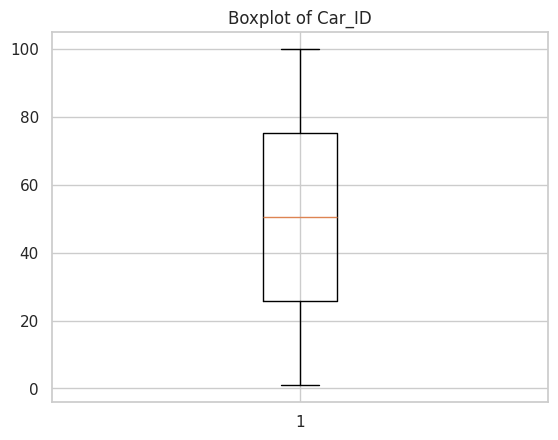

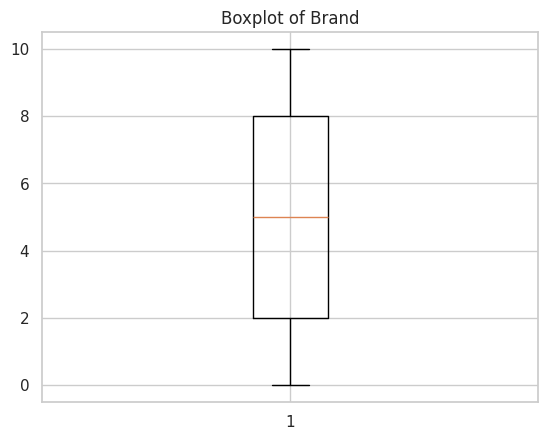

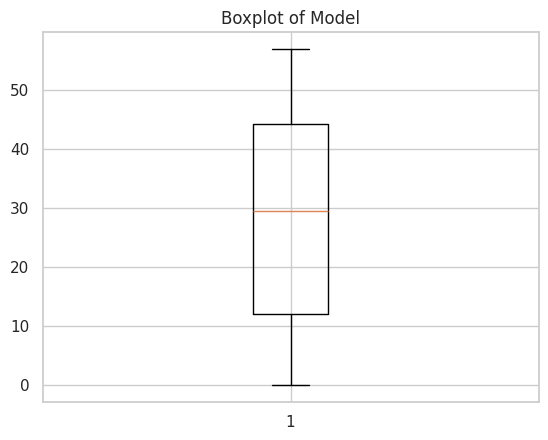

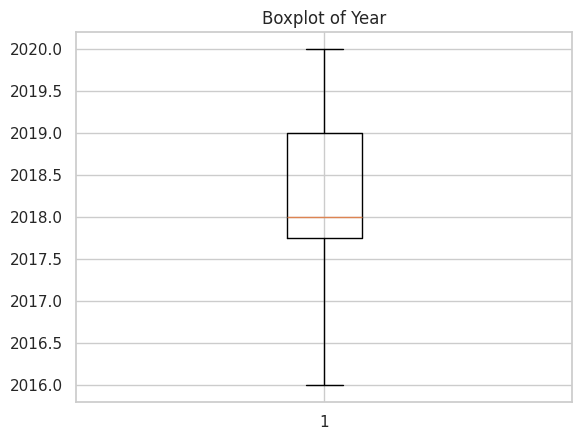

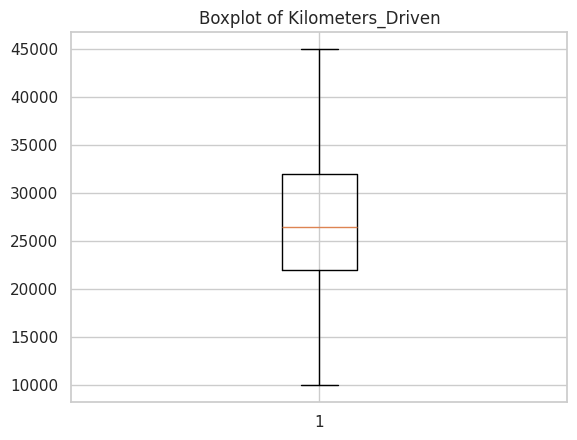

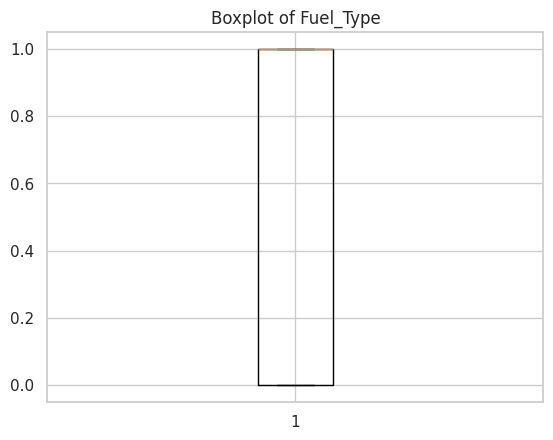

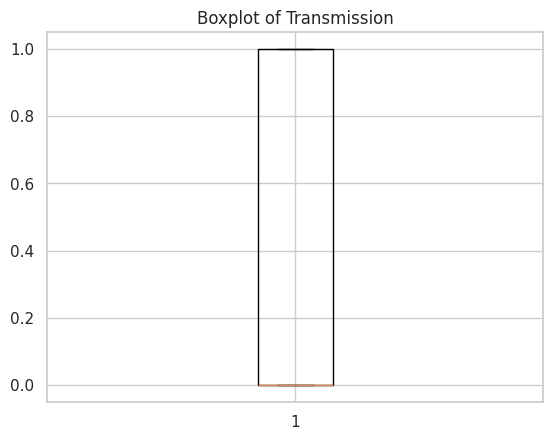

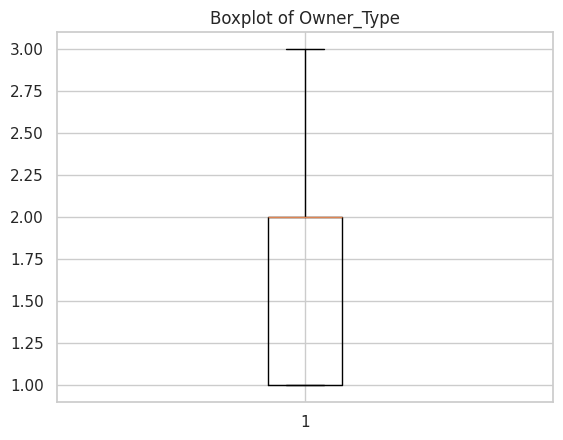

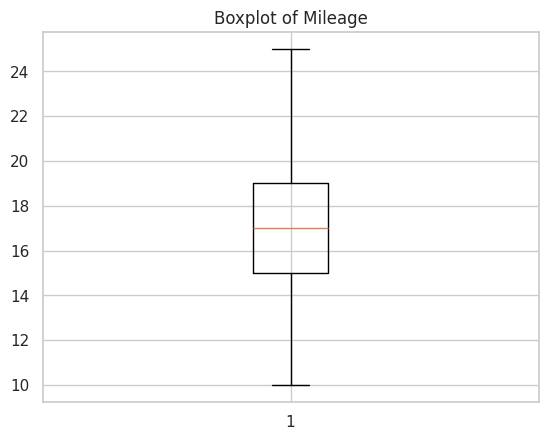

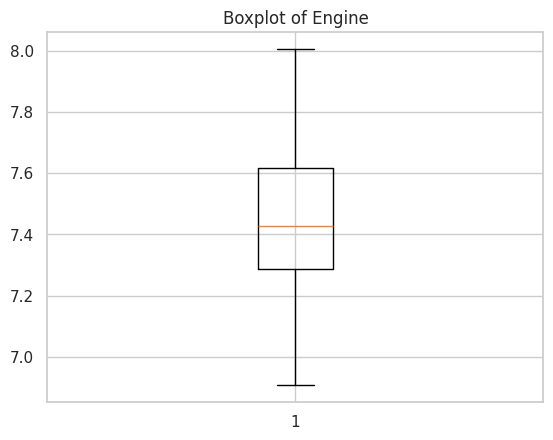

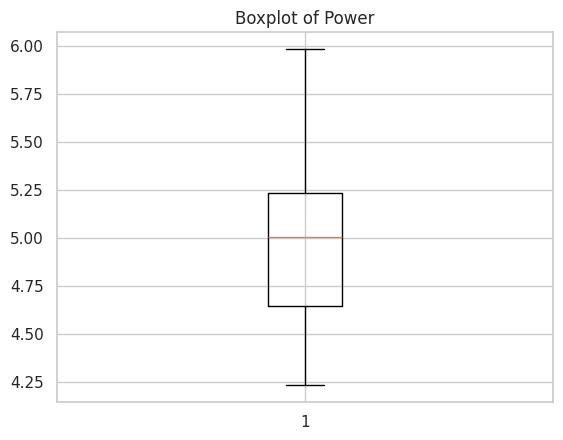

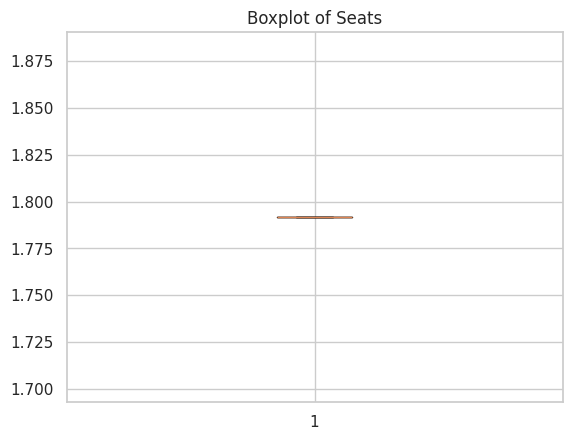

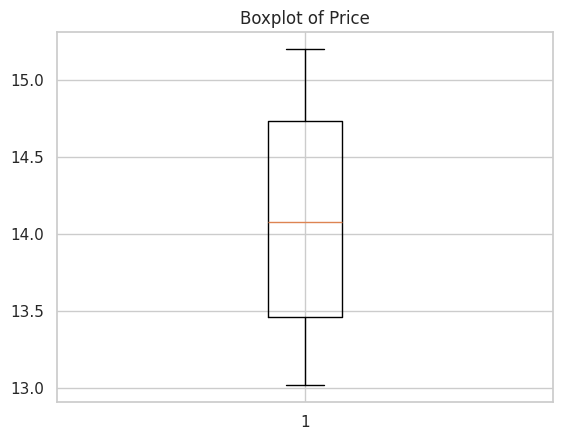

In [ ]:
#check outlier semua feature numerikal menggunakan boxplot
import matplotlib.pyplot as plt
import numpy as np

numerical_columns = df.select_dtypes(include=[np.number]).columns

for column in numerical_columns:
  plt.boxplot(df[column])
  plt.title(f"Boxplot of {column}")
  plt.show()

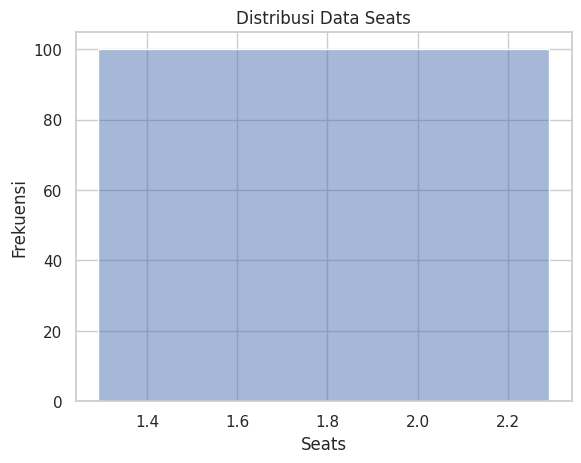

Skewness: 0.0
Distribusi data Seats cenderung simetris (mendekati Gaussian).


In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Plot distribusi data 'Seats'
sns.histplot(df['Seats'], kde=True)
plt.title('Distribusi Data Seats')
plt.xlabel('Seats')
plt.ylabel('Frekuensi')
plt.show()

# Cek skewness
skewness = df['Seats'].skew()
print(f'Skewness: {skewness}')

# Interpretasi skewness
if skewness > 0:
    print('Distribusi data Seats cenderung right-skewed (positive skew).')
elif skewness < 0:
    print('Distribusi data Seats cenderung left-skewed (negative skew).')
else:
    print('Distribusi data Seats cenderung simetris (mendekati Gaussian).')

Skewness diartikan sebagai kemiringan distribusi data. Sebuah distribusi yang tidak simetris akan memiliki rata-rata, median, dan modus yang tidak sama besarnya sehingga distribusi akan terkonsentrasi pada salah satu sisi dan kurvanya akan menceng.

Ukuran kemiringan kurva adalah derajat atau ukuran dari ketidaksimetrian suatu distribusi data. Nilai skewness (ukuran kemiringan) menunjukkan data normal ketika nilai-nilai tersebut berada di antara rentang nilai -2 sampai dengan 2. Kurva positif apabila rata-rata hitung > modus/median. Kurva negative apabila rata-rata hitung < modus/media

sumber : https://accounting.binus.ac.id/2021/08/12/memahami-nilai-skewness-ukuran-kemiringan-dalam-statistik-deskriptif/#:~:text=Skewness%20diartikan%20sebagai%20kemiringan%20distribusi,sisi%20dan%20kurvanya%20akan%20menceng.

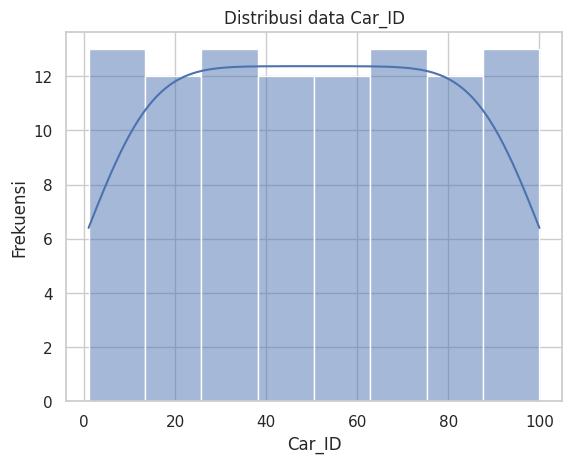

Skewness: 0.0000
Median: 50.5
Modus: 1.0
Mean: 50.5
Distribusi data Price cenderung simetris (mendekati Gaussian).


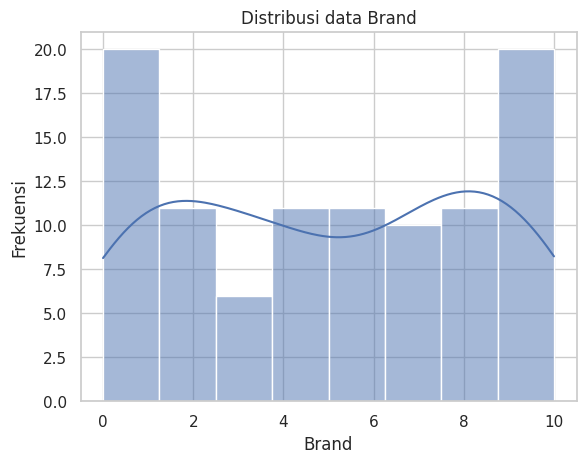

Skewness: -0.0200
Median: 5.0
Modus: 2
Mean: 5.03
Distribusi data Price cenderung left-skewed (negative skew).


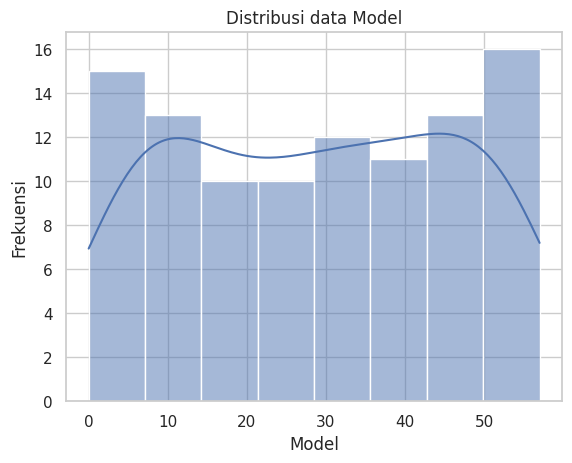

Skewness: -0.0173
Median: 29.5
Modus: 7.0
Mean: 28.77
Distribusi data Price cenderung left-skewed (negative skew).


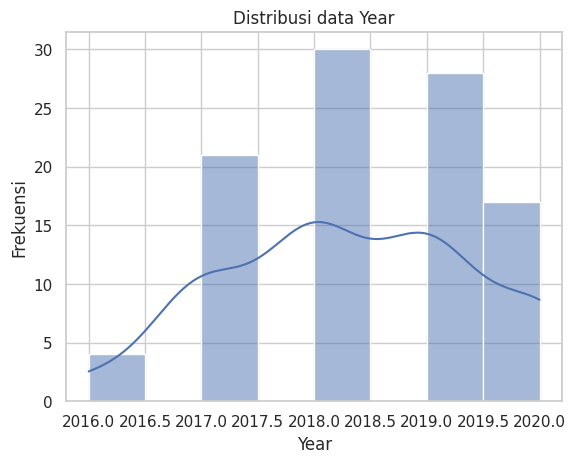

Skewness: -0.1014
Median: 2018.0
Modus: 2018
Mean: 2018.33
Distribusi data Price cenderung left-skewed (negative skew).


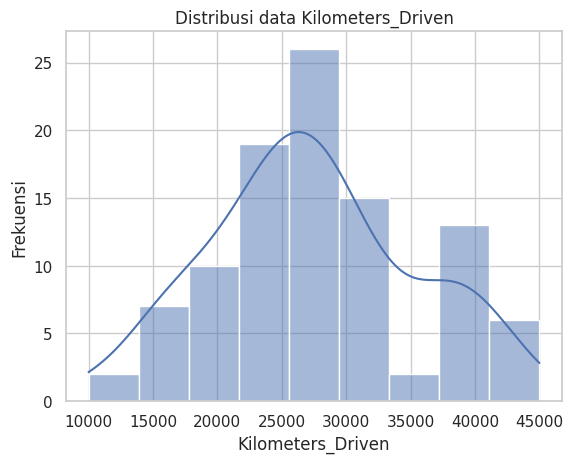

Skewness: 0.1521
Median: 26500.0
Modus: 26000
Mean: 27360.0
Distribusi data Price cenderung right-skewed (positive skew).


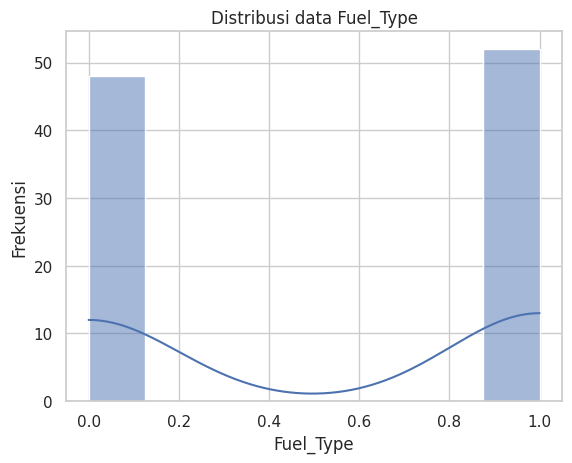

Skewness: -0.0813
Median: 1.0
Modus: 1
Mean: 0.52
Distribusi data Price cenderung left-skewed (negative skew).


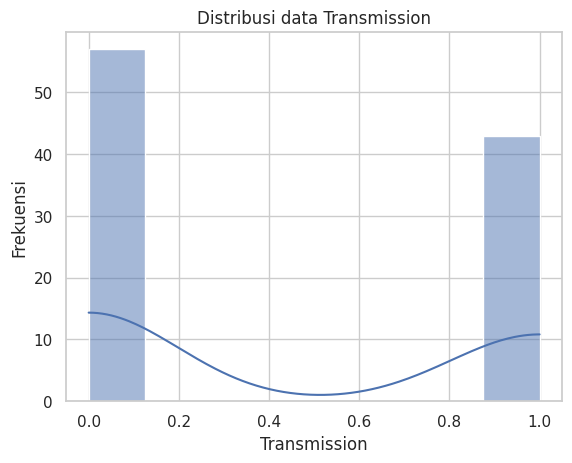

Skewness: 0.2871
Median: 0.0
Modus: 0
Mean: 0.43
Distribusi data Price cenderung right-skewed (positive skew).


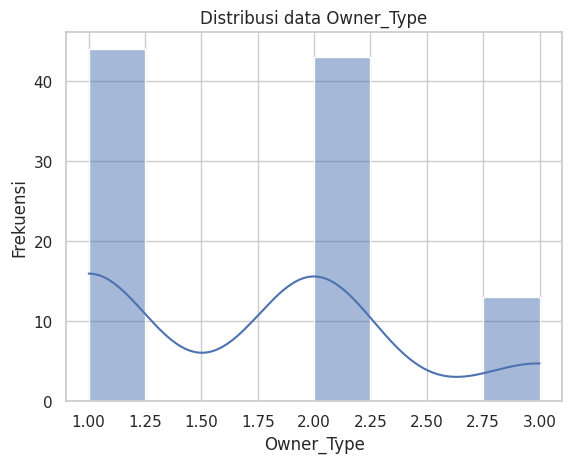

Skewness: 0.4996
Median: 2.0
Modus: 1
Mean: 1.69
Distribusi data Price cenderung right-skewed (positive skew).


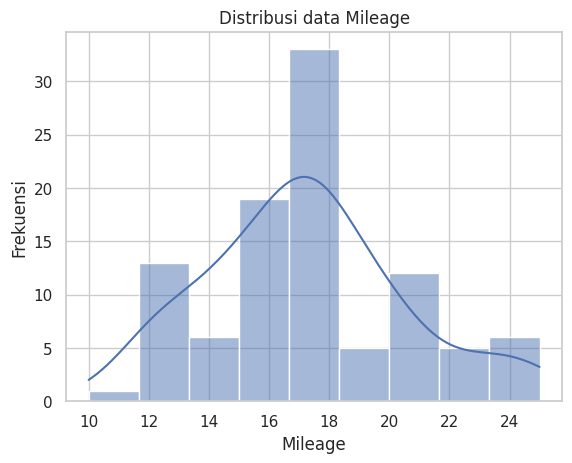

Skewness: 0.3726
Median: 17.0
Modus: 17
Mean: 17.21
Distribusi data Price cenderung right-skewed (positive skew).


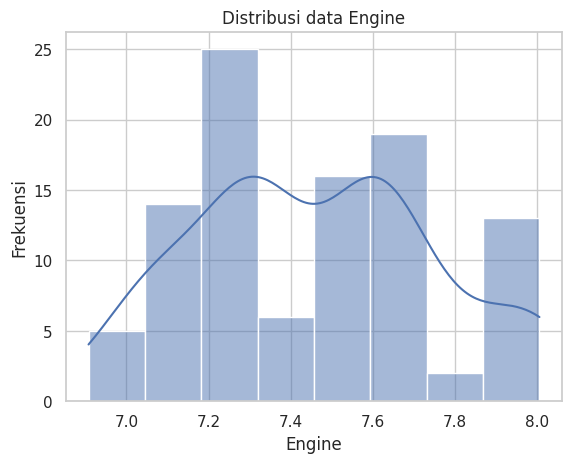

Skewness: 0.1814
Median: 7.426874619781243
Modus: 7.312553498102598
Mean: 7.466028197048188
Distribusi data Price cenderung right-skewed (positive skew).


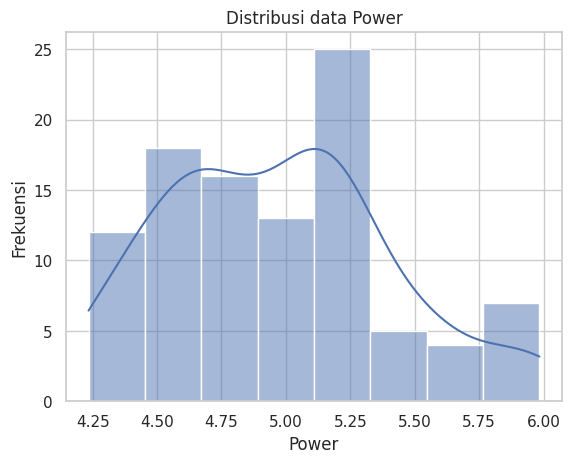

Skewness: 0.3966
Median: 5.003946305945459
Modus: 4.6443908991413725
Mean: 4.970599671406976
Distribusi data Price cenderung right-skewed (positive skew).


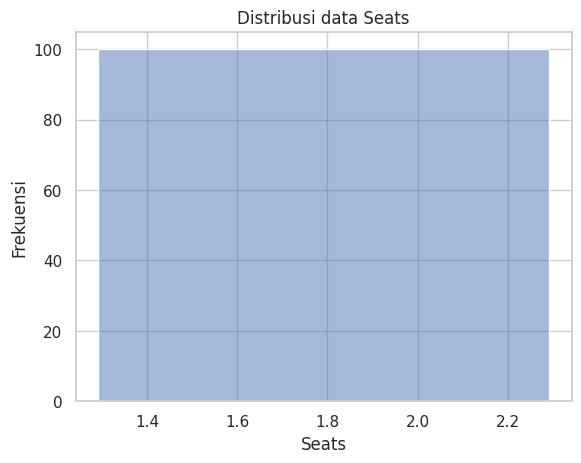

Skewness: 0.0000
Median: 1.791759469228055
Modus: 1.791759469228055
Mean: 1.7917594692280547
Distribusi data Price cenderung simetris (mendekati Gaussian).


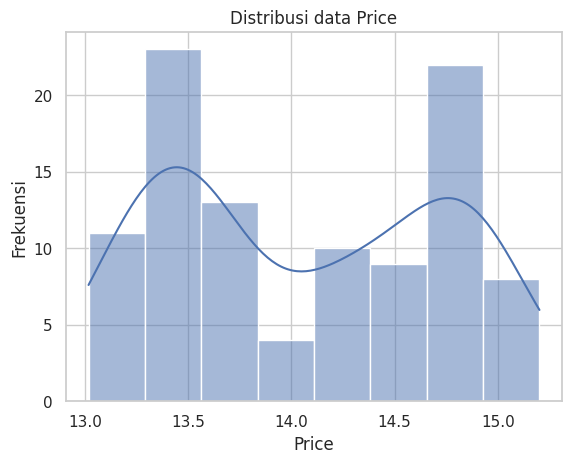

Skewness: 0.0884
Median: 14.077875591662238
Modus: 13.652992804936396
Mean: 14.05632283656275
Distribusi data Price cenderung right-skewed (positive skew).


In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
#cek skewness data
# Visualisasi Semua distribusi
numerical_cols = df.select_dtypes(include=np.number).columns
for i in numerical_cols:
  sns.histplot(df[i], kde=True)
  plt.title(f'Distribusi data {i}')
  plt.xlabel(i)
  plt.ylabel('Frekuensi')
  plt.show()

  # Cek skewness
  skewness = df[i].skew()
  print(f'Skewness: {skewness:.4f}')

  #print median, modus dan mean nya
  print("Median:", df[i].median())
  print("Modus:", df[i].mode()[0])
  print("Mean:", df[i].mean())

  # Interpretasi
  if skewness > 0:
      print('Distribusi data Price cenderung right-skewed (positive skew).')
  elif skewness < 0:
      print('Distribusi data Price cenderung left-skewed (negative skew).')
  else:
      print('Distribusi data Price cenderung simetris (mendekati Gaussian).')

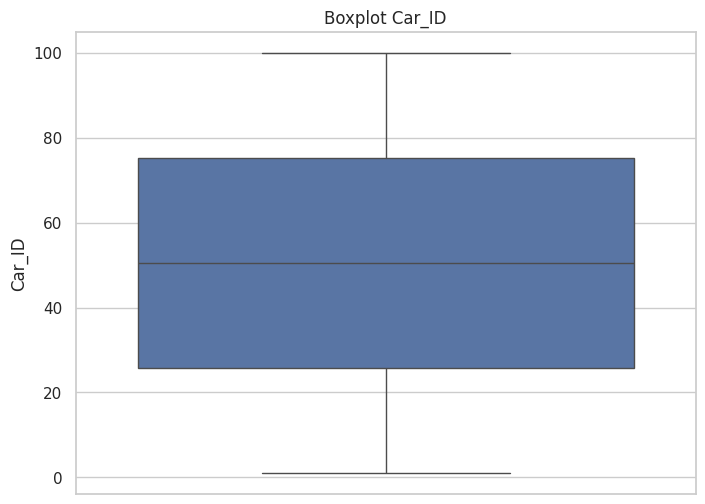

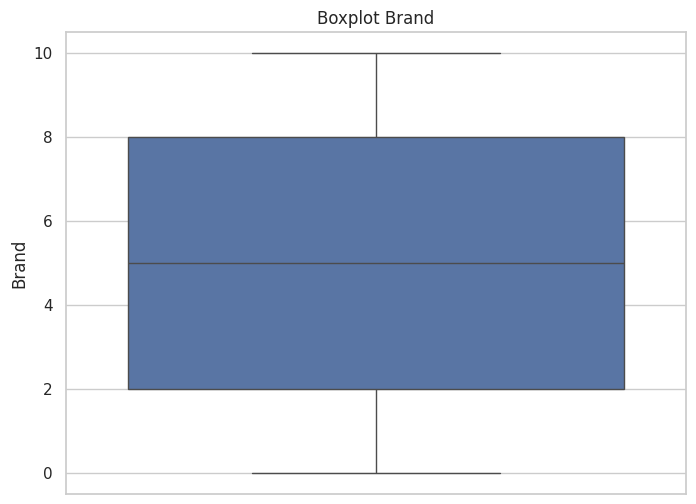

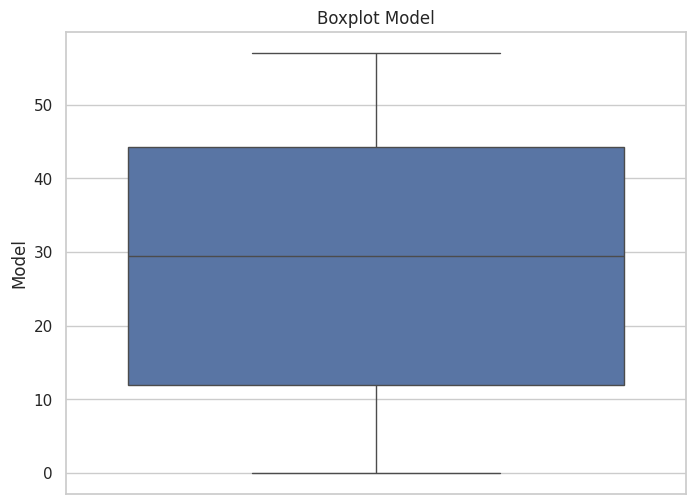

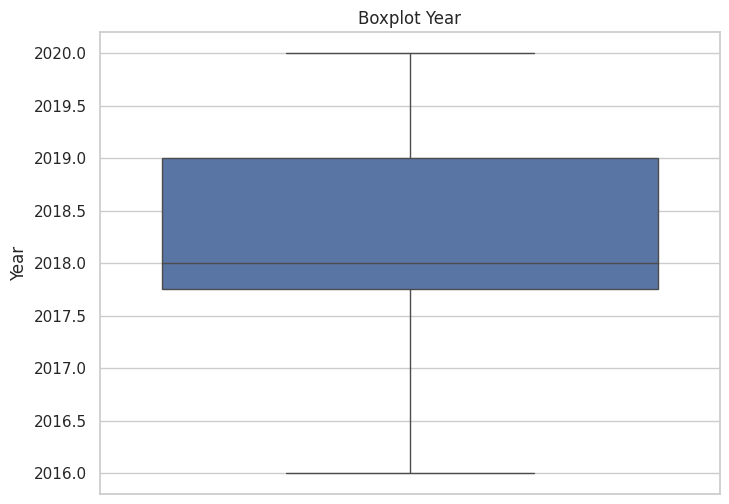

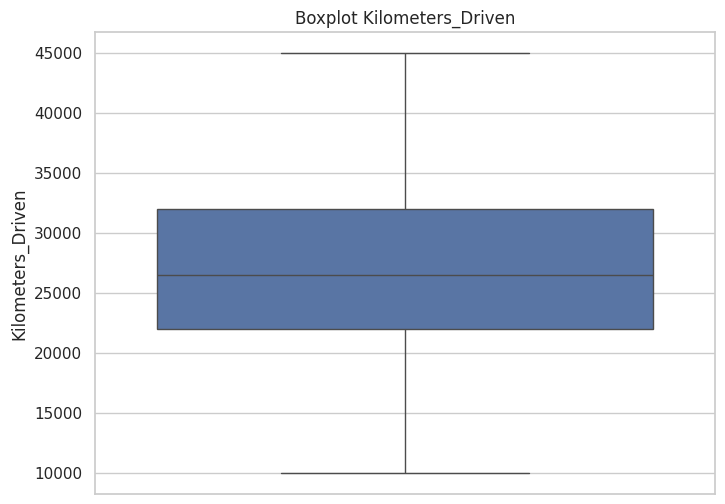

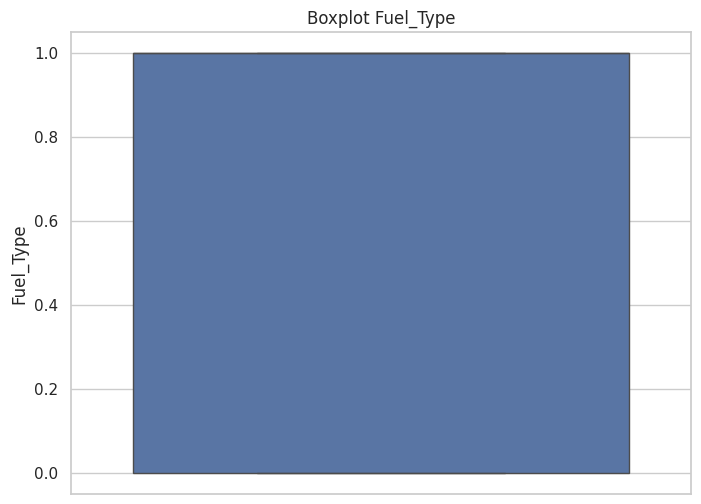

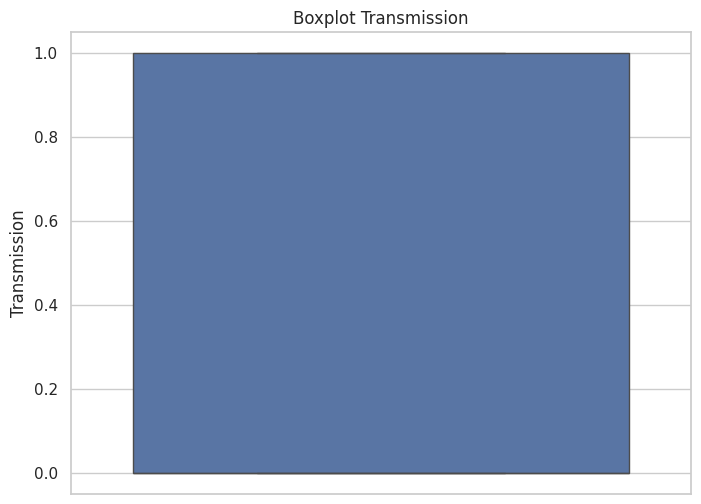

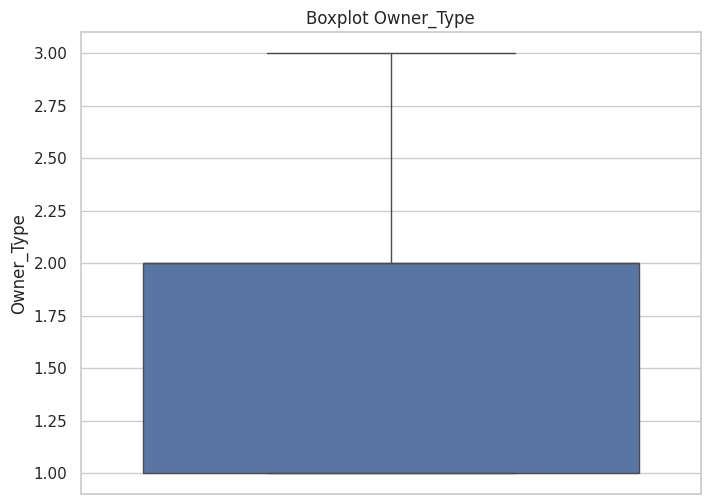

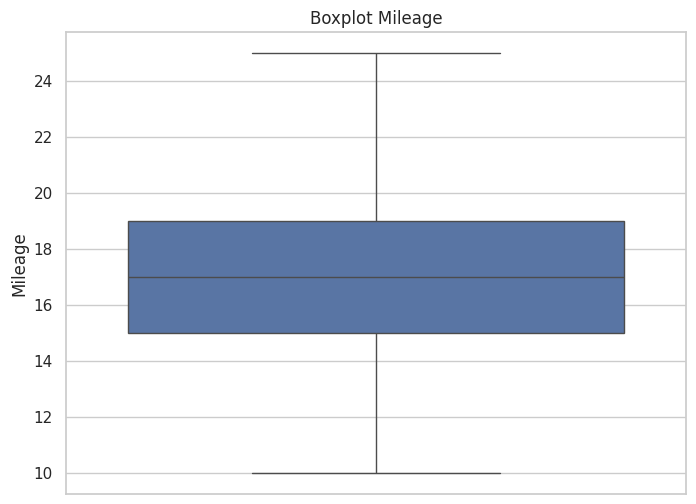

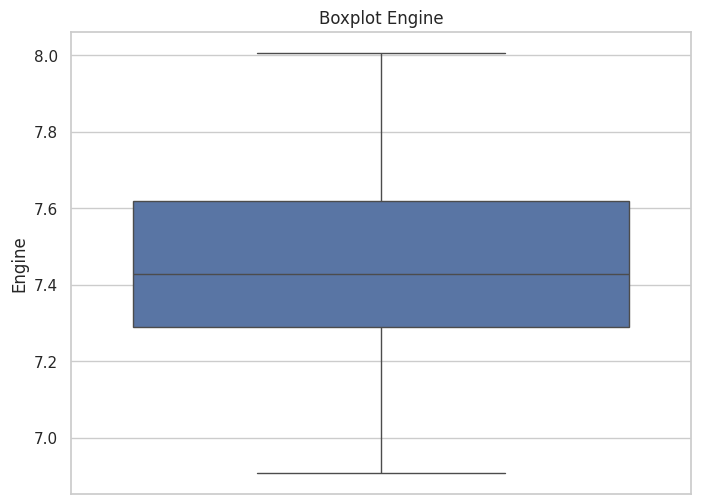

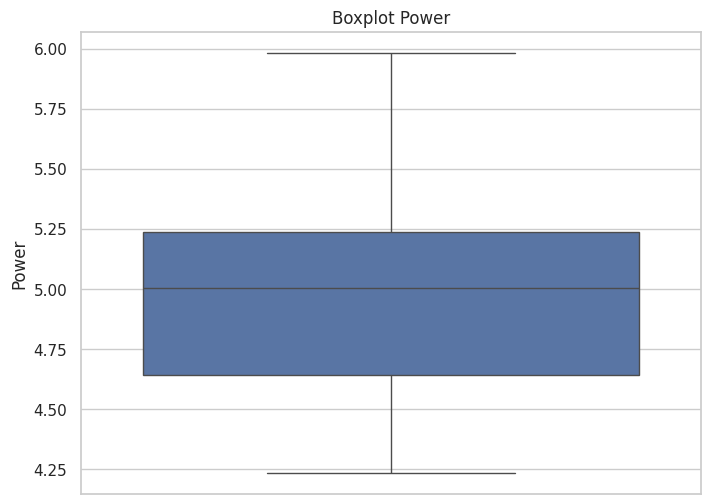

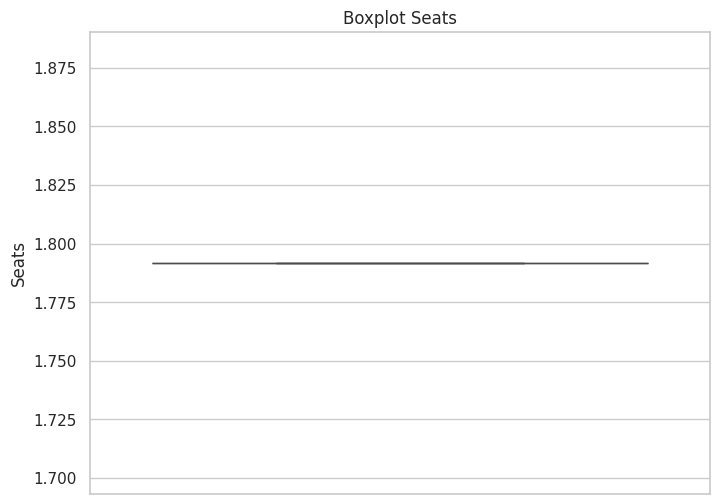

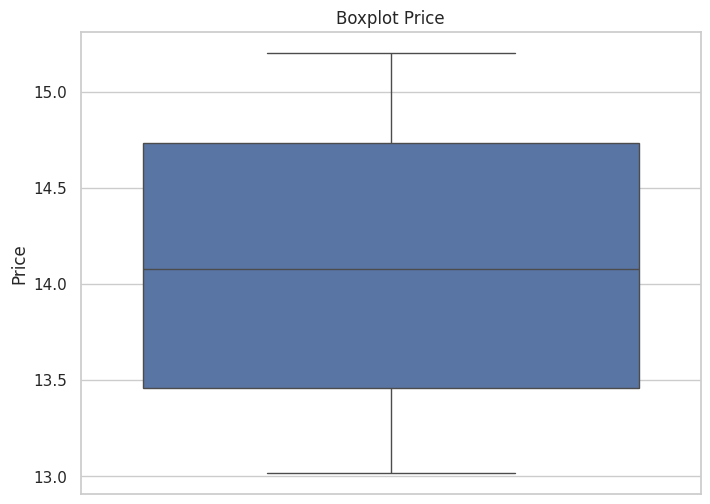

In [ ]:
# Pilih kolom numerik
numerical_cols = df.select_dtypes(include=np.number).columns

# Buat boxplot untuk setiap kolom numerik
for col in numerical_cols:
    plt.figure(figsize=(8, 6))  # Atur ukuran gambar
    sns.boxplot(y=df[col])  # Buat boxplot
    plt.title(f'Boxplot {col}')  # Judul boxplot
    plt.ylabel(col)  # Label sumbu y
    plt.show()  # Tampilkan boxplot

In [ ]:
outlier_features = []
for col in numerical_columns:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    if df[(df[col] < lower_bound) | (df[col] > upper_bound)].shape[0] > 0:
        outlier_features.append(col)

print("Fitur yang memiliki outlier:", outlier_features)

Fitur yang memiliki outlier: []


In [ ]:
import pandas as pd

# Assuming 'df' is your DataFrame
Q1 = df['Engine'].quantile(0.25)
Q3 = df['Engine'].quantile(0.75)
IQR = Q3 - Q1

# Batas bawah dan atas
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Mencari outlier
outliers = df[(df['Engine'] < lower_bound) | (df['Engine'] > upper_bound)]['Engine']

# Menampilkan nilai outlier
print("Nilai outlier di feature 'Engine':")
print(outliers)

Nilai outlier di feature 'Engine':
Series([], Name: Engine, dtype: float64)


In [ ]:
import pandas as pd

# Assuming 'df' is your DataFrame
Q1 = df['Power'].quantile(0.25)
Q3 = df['Power'].quantile(0.75)
IQR = Q3 - Q1

# Batas bawah dan atas
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Mencari outlier
outliers = df[(df['Power'] < lower_bound) | (df['Power'] > upper_bound)]['Power']

# Menampilkan nilai outlier
print("Nilai outlier di feature 'Power':")
print(outliers)

Nilai outlier di feature 'Power':
Series([], Name: Power, dtype: float64)


In [ ]:
df.head()

,Car_ID,Brand,Model,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price
0,1.0,9,15.0,2018,27000,1,1,1,15,7.312553,4.691348,1.791759,13.592368
1,2.0,3,14.0,2019,40000,1,0,2,17,7.376508,4.948760,1.791759,13.815512
2,3.0,2,30.0,2017,20000,1,0,1,10,7.476616,5.981414,1.791759,14.731802
3,4.0,6,42.0,2020,30000,0,1,3,23,7.130099,4.317488,1.791759,13.304687
4,5.0,4,41.0,2016,27000,0,0,2,18,7.600902,5.273000,1.791759,13.652993


##Feature Engineering

In [ ]:
#code goes here
df.head()

,Car_ID,Brand,Model,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price
0,1.0,9,15.0,2018,27000,1,1,1,15,7.312553,4.691348,1.791759,13.592368
1,2.0,3,14.0,2019,40000,1,0,2,17,7.376508,4.948760,1.791759,13.815512
2,3.0,2,30.0,2017,20000,1,0,1,10,7.476616,5.981414,1.791759,14.731802
3,4.0,6,42.0,2020,30000,0,1,3,23,7.130099,4.317488,1.791759,13.304687
4,5.0,4,41.0,2016,27000,0,0,2,18,7.600902,5.273000,1.791759,13.652993


In [ ]:
# Cek missing values
print("Missing values sebelum penanganan:")
print(df.isnull().sum())

Missing values sebelum penanganan:
Car_ID               0
Brand                0
Model                0
Year                 0
Kilometers_Driven    0
Fuel_Type            0
Transmission         0
Owner_Type           0
Mileage              0
Engine               0
Power                0
Seats                0
Price                0
dtype: int64


In [ ]:
# Mengisi missing values
df['Seats'].fillna(df['Seats'].mode()[0], inplace=True)
df['Engine'].fillna(df['Engine'].median(), inplace=True)
df['Power'].fillna(df['Power'].median(), inplace=True)

In [ ]:
df.dropna(subset=['Price'], inplace=True)

In [ ]:
df.isna().sum()

,0
Car_ID,0
Brand,0
Model,0
Year,0
Kilometers_Driven,0
Fuel_Type,0
Transmission,0
Owner_Type,0
Mileage,0
Engine,0


In [ ]:
df['Price'].head()

,Price
0,13.592368
1,13.815512
2,14.731802
3,13.304687
4,13.652993


In [ ]:
# Pembuatan fitur
# Mobil Tua = Harga semakin turun
df['Car_Age'] = 2025 - df['Year']

# Rasio power per kapasitas mesin
df['Power_per_CC'] = df['Power'] / df['Engine']

In [ ]:
df.head(5)

,Car_ID,Brand,Model,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price,Car_Age,Power_per_CC
0,1.0,9,15.0,2018,27000,1,1,1,15,7.312553,4.691348,1.791759,13.592368,7,0.641547
1,2.0,3,14.0,2019,40000,1,0,2,17,7.376508,4.948760,1.791759,13.815512,6,0.670881
2,3.0,2,30.0,2017,20000,1,0,1,10,7.476616,5.981414,1.791759,14.731802,8,0.800016
3,4.0,6,42.0,2020,30000,0,1,3,23,7.130099,4.317488,1.791759,13.304687,5,0.605530
4,5.0,4,41.0,2016,27000,0,0,2,18,7.600902,5.273000,1.791759,13.652993,9,0.693733


In [ ]:
# One hot encoding untuk fitur kategorikal karena sebelum nya kategori nya terlalu banyak
df = pd.get_dummies(df, columns=['Fuel_Type', 'Transmission', 'Owner_Type'], drop_first=True)

In [ ]:
from sklearn.preprocessing import LabelEncoder

In [ ]:
# Brand dan Model punya terlalu banyak kategori jadi menggunakan label enoding untuk mengubah teks menjadi angka berdasarkan urutan kemunculannya
le_brand = LabelEncoder()
le_model = LabelEncoder()

df['Brand'] = le_brand.fit_transform(df['Brand'])
df['Model'] = le_model.fit_transform(df['Model'])

In [ ]:
# # Scaling untuk Fitur numerik
# from sklearn.preprocessing import StandardScaler

# # StandardScaler menstandarisasi data ke distribusi normal (mean 0, std 1)
# numerical_cols = ['Kilometers_Driven', 'Mileage', 'Engine', 'Power', 'Car_Age', 'Power_per_CC']
# scaler = StandardScaler()
# df[numerical_cols] = scaler.fit_transform(df[numerical_cols])

In [ ]:
print("Data akhir siap modeling:")
print(df.head())
print("Bentuk dataset:", df.shape)

Data akhir siap modeling:
   Car_ID  Brand  Model  Year  Kilometers_Driven  Mileage    Engine     Power  \
0     1.0      9     15  2018              27000       15  7.312553  4.691348   
1     2.0      3     14  2019              40000       17  7.376508  4.948760   
2     3.0      2     30  2017              20000       10  7.476616  5.981414   
3     4.0      6     42  2020              30000       23  7.130099  4.317488   
4     5.0      4     41  2016              27000       18  7.600902  5.273000   

      Seats      Price  Car_Age  Power_per_CC  Fuel_Type_1  Transmission_1  \
0  1.791759  13.592368        7      0.641547         True            True   
1  1.791759  13.815512        6      0.670881         True           False   
2  1.791759  14.731802        8      0.800016         True           False   
3  1.791759  13.304687        5      0.605530        False            True   
4  1.791759  13.652993        9      0.693733        False           False   

   Owner_Type_2  O

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# Hitung korelasi antar fitur
correlation_matrix = df.corr()

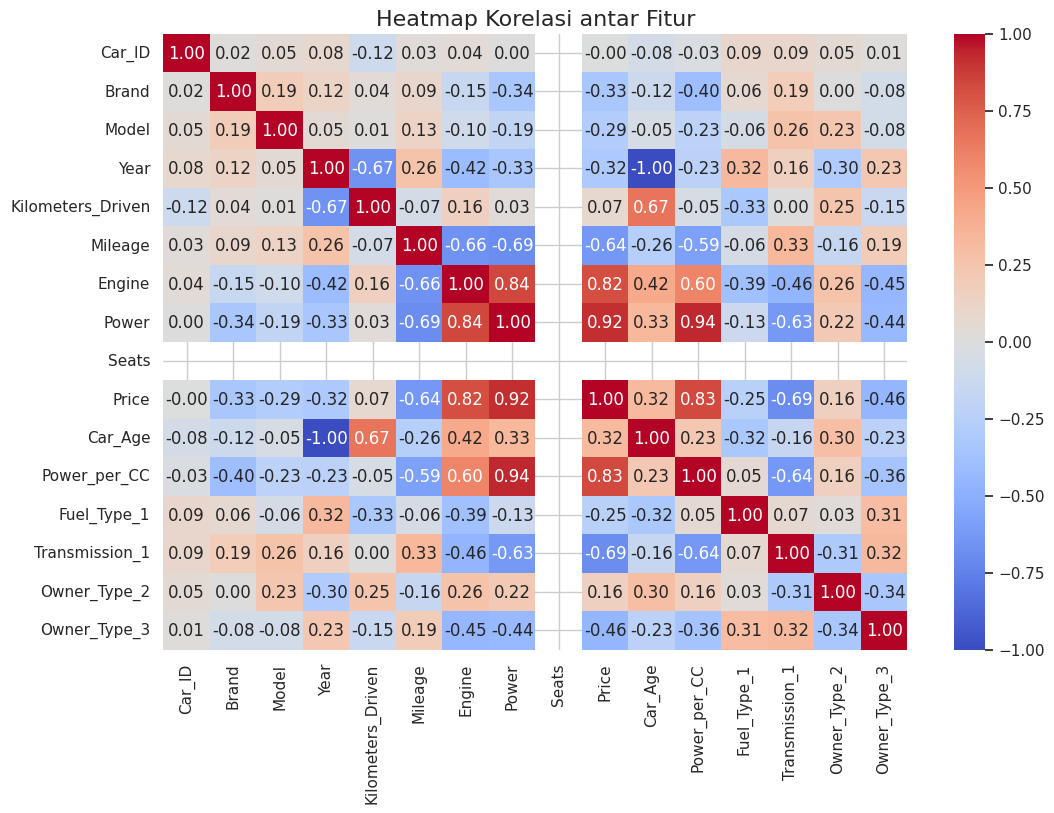

In [ ]:
# Heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Heatmap Korelasi antar Fitur", fontsize=16)
plt.show()

In [ ]:
# Fitur yang paling berpengaruh terhadap harga
selected_features = [
    'Power',
    'Engine',
    'Car_Age',
    'Power_per_CC',
    'Mileage',
    'Transmission_1'
]

In [ ]:
X = df[selected_features]
y = df['Price']

In [ ]:
df.head()

,Car_ID,Brand,Model,Year,Kilometers_Driven,Mileage,Engine,Power,Seats,Price,Car_Age,Power_per_CC,Fuel_Type_1,Transmission_1,Owner_Type_2,Owner_Type_3
0,1.0,9,15,2018,27000,15,7.312553,4.691348,1.791759,13.592368,7,0.641547,True,True,False,False
1,2.0,3,14,2019,40000,17,7.376508,4.948760,1.791759,13.815512,6,0.670881,True,False,True,False
2,3.0,2,30,2017,20000,10,7.476616,5.981414,1.791759,14.731802,8,0.800016,True,False,False,False
3,4.0,6,42,2020,30000,23,7.130099,4.317488,1.791759,13.304687,5,0.605530,False,True,False,True
4,5.0,4,41,2016,27000,18,7.600902,5.273000,1.791759,13.652993,9,0.693733,False,False,True,False


#Model Buiding


Cross-Validation MSE (per fold): [0.05068034 0.06604028 0.05205046 0.08136417 0.03400485]
Average CV MSE: 0.056828017894536634
Mean Squared Error (MSE): 0.0453
Root Mean Squared Error (RMSE): 0.2128
R² Score: 0.8866
R-squared (Train): 0.9950
R-squared (Test): 0.8866


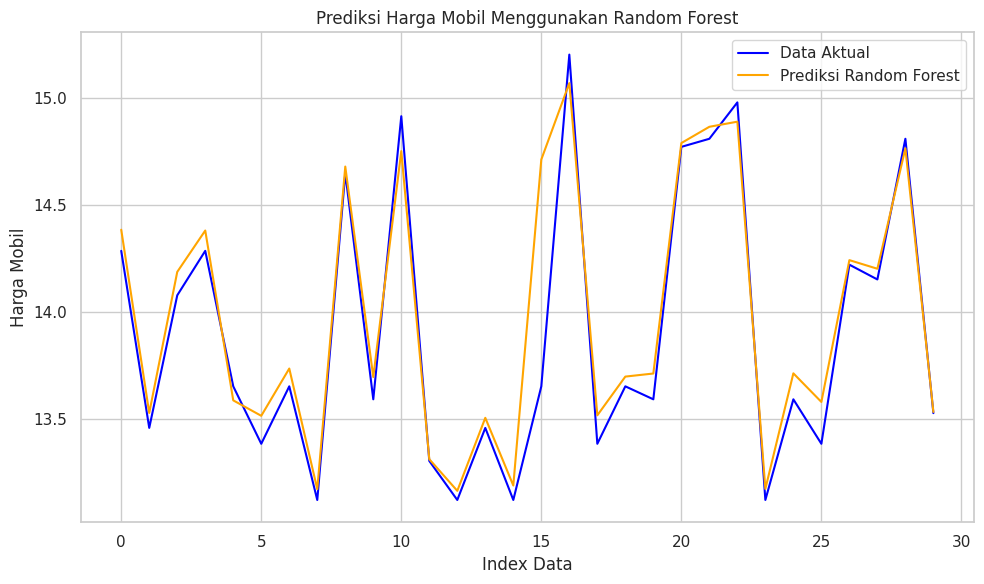

R² CV per fold: [0.61593049 0.98855102 0.9944185  0.99203073 0.99390058]
Average R² CV  : 0.9169662629050922


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings

from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score, make_scorer
from sklearn.model_selection import train_test_split, KFold, cross_val_score

warnings.filterwarnings("ignore")

# ---------------------------
# 1. Preprocessing Function
# ---------------------------
def preprocess_data(df, target_col='Price', test_size=0.3):
    X = df.drop(columns=[target_col])
    y = df[target_col]

    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=test_size, random_state=42, shuffle=True
    )

    scaler_X = StandardScaler()
    X_train_scaled = scaler_X.fit_transform(X_train)
    X_test_scaled = scaler_X.transform(X_test)

    scaler_y = StandardScaler()
    y_train_scaled = scaler_y.fit_transform(y_train.values.reshape(-1, 1)).ravel()
    y_test_scaled = scaler_y.transform(y_test.values.reshape(-1, 1)).ravel()

    return X_train_scaled, X_test_scaled, y_train_scaled, y_test_scaled, scaler_y, y_test

# ---------------------------
# 2. Train Random Forest Model
# ---------------------------
def train_rf_model(X_train, y_train, n_estimators=200 ):
    model = RandomForestRegressor(max_depth= 10, max_features= 0.5, min_samples_leaf = 1, min_samples_split = 2, n_estimators = 200)
    model.fit(X_train, y_train)
    return model

# ---------------------------
# 3. Cross Validation
# ---------------------------
def cross_validate_model(model, X, y, folds=5):
    kf = KFold(n_splits=folds, shuffle=True, random_state=42)
    scorer = make_scorer(mean_squared_error, greater_is_better=False)
    cv_scores = cross_val_score(model, X, y, cv=kf, scoring=scorer)
    print("Cross-Validation MSE (per fold):", -cv_scores)
    print("Average CV MSE:", -np.mean(cv_scores))

# ---------------------------
# 4. Evaluation Function
# ---------------------------
def evaluate_model(y_true_scaled, y_pred_scaled, scaler_y):
    y_true = scaler_y.inverse_transform(y_true_scaled.reshape(-1, 1))
    y_pred = scaler_y.inverse_transform(y_pred_scaled.reshape(-1, 1))

    mse = mean_squared_error(y_true, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_true, y_pred)

    print(f"Mean Squared Error (MSE): {mse:.4f}")
    print(f"Root Mean Squared Error (RMSE): {rmse:.4f}")
    print(f"R² Score: {r2:.4f}")

    return y_true, y_pred

# ---------------------------
# 5. Plot Prediction
# ---------------------------
def plot_predictions(y_true, y_pred):
    plt.figure(figsize=(10,6))
    plt.plot(y_true, label='Data Aktual', color='blue')
    plt.plot(y_pred, label='Prediksi Random Forest', color='orange')
    plt.title('Prediksi Harga Mobil Menggunakan Random Forest')
    plt.xlabel('Index Data')
    plt.ylabel('Harga Mobil')
    plt.legend()
    plt.tight_layout()
    plt.show()

# ==============================
# MAIN PIPELINE
# ==============================

# Asumsikan df sudah tersedia
X_train_scaled, X_test_scaled, y_train_scaled, y_test_scaled, scaler_y, y_test_raw = preprocess_data(df)

# Train Random Forest
rf_model = train_rf_model(X_train_scaled, y_train_scaled)

# Cross-Validation
cross_validate_model(rf_model, X_train_scaled, y_train_scaled)

# Prediksi untuk data train
y_train_pred_scaled = rf_model.predict(X_train_scaled)

# Prediction
y_pred_scaled = rf_model.predict(X_test_scaled)

# Evaluation
y_true, y_pred = evaluate_model(y_test_scaled, y_pred_scaled, scaler_y)

# R-squared untuk data train
r2_train = r2_score(y_train_scaled, y_train_pred_scaled)
print(f"R-squared (Train): {r2_train:.4f}")

# R-squared untuk data test
r2_test = r2_score(y_test_scaled, y_pred_scaled)
print(f"R-squared (Test): {r2_test:.4f}")

# Visualization
plot_predictions(y_true, y_pred)

from sklearn.model_selection import cross_val_score
cv_r2 = cross_val_score(
    rf_model, X, y, cv=5, # Replace 'model' with 'rf_model'
    scoring="r2", n_jobs=-1
)
print("R² CV per fold:", cv_r2)
print("Average R² CV  :", cv_r2.mean())

Fitting 5 folds for each of 324 candidates, totalling 1620 fits
Best params   : {'max_depth': 10, 'max_features': 0.5, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}
Best R² (CV)  : 0.9474472152653082
Cross-Validation MSE (per fold): [0.05631024 0.07450882 0.04956142 0.07066959 0.03114032]
Average CV MSE: 0.056438074547130346
Mean Squared Error (MSE): 0.0455
Root Mean Squared Error (RMSE): 0.2134
R² Score: 0.8859
R-squared (Train): 0.9945
R-squared (Test) : 0.8859


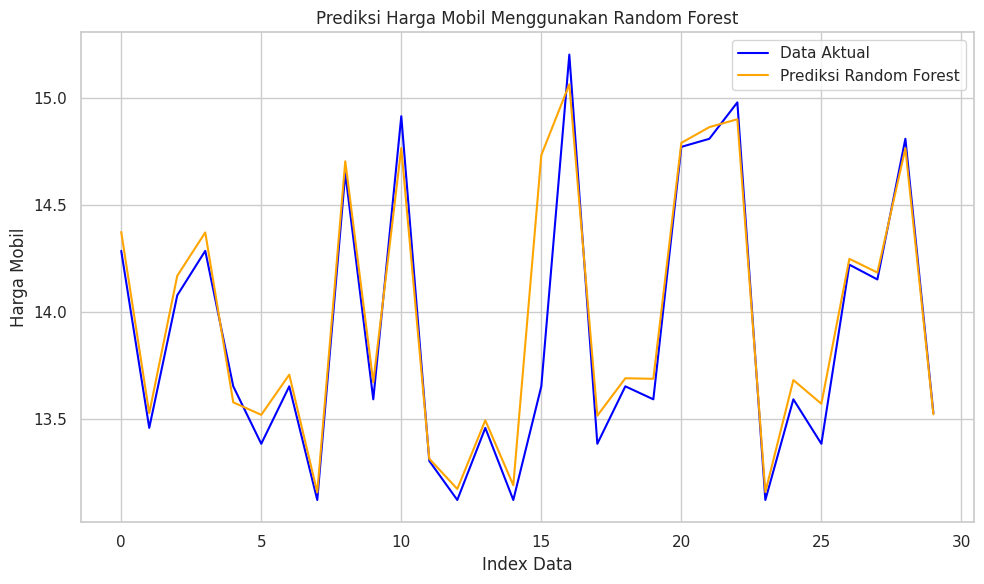

R² CV per fold: [0.94776981 0.91234079 0.97163374 0.95100374 0.95448799]
Average R² CV  : 0.9474472152653082


In [ ]:
-S#Hyperparameter tuning
from sklearn.model_selection import GridSearchCV

def tune_rf_model(X_train, y_train, cv=5, n_jobs=-1):
    """
    Cari kombinasi parameter terbaik untuk RandomForestRegressor
    menggunakan GridSearchCV.
    """
    param_grid = {
        'n_estimators': [100, 200, 300],
        'max_depth': [None, 10, 20, 30],
        'min_samples_split': [2, 5, 10],
        'min_samples_leaf': [1, 2, 4],
        'max_features': ['auto', 'sqrt', 0.5]
    }

    base_rf = RandomForestRegressor(random_state=42)
    grid = GridSearchCV(
        estimator=base_rf,
        param_grid=param_grid,
        scoring='r2',
        cv=cv,
        n_jobs=n_jobs,
        verbose=1
    )
    grid.fit(X_train, y_train)

    print("Best params   :", grid.best_params_)
    print("Best R² (CV)  :", grid.best_score_)
    return grid.best_estimator_

# ======================================
#    GANTI BAGIAN TRAINING di pipeline
# ======================================
# X_train_scaled, X_test_scaled, y_train_scaled, y_test_scaled, scaler_y, y_test_raw = preprocess_data(df)

# Dari:
# rf_model = train_rf_model(X_train_scaled, y_train_scaled)

# Menjadi:
rf_model = tune_rf_model(X_train_scaled, y_train_scaled)

# Lalu lanjutkan sisa pipeline:
cross_validate_model(rf_model, X_train_scaled, y_train_scaled)
y_train_pred_scaled = rf_model.predict(X_train_scaled)
y_pred_scaled       = rf_model.predict(X_test_scaled)
y_true, y_pred      = evaluate_model(y_test_scaled, y_pred_scaled, scaler_y)

r2_train = r2_score(y_train_scaled, y_train_pred_scaled)
print(f"R-squared (Train): {r2_train:.4f}")
r2_test  = r2_score(y_test_scaled, y_pred_scaled)
print(f"R-squared (Test) : {r2_test:.4f}")

plot_predictions(y_true, y_pred)

cv_r2 = cross_val_score(
    rf_model, X_train_scaled, y_train_scaled,
    cv=5, scoring="r2", n_jobs=-1
)
print("R² CV per fold:", cv_r2)
print("Average R² CV  :", cv_r2.mean())


Waktu pelatihan: 0.0005 detik
Cross-Validation MSE (per fold): [0.15033978 0.06541779 0.05063465 0.08830328 0.01848269]
Average CV MSE: 0.07463563666235373
R-squared (Train): 1.0000
R-squared (Test): 0.8931
Mean Squared Error (MSE): 0.0427
Root Mean Squared Error (RMSE): 0.2066
R² Score: 0.8931


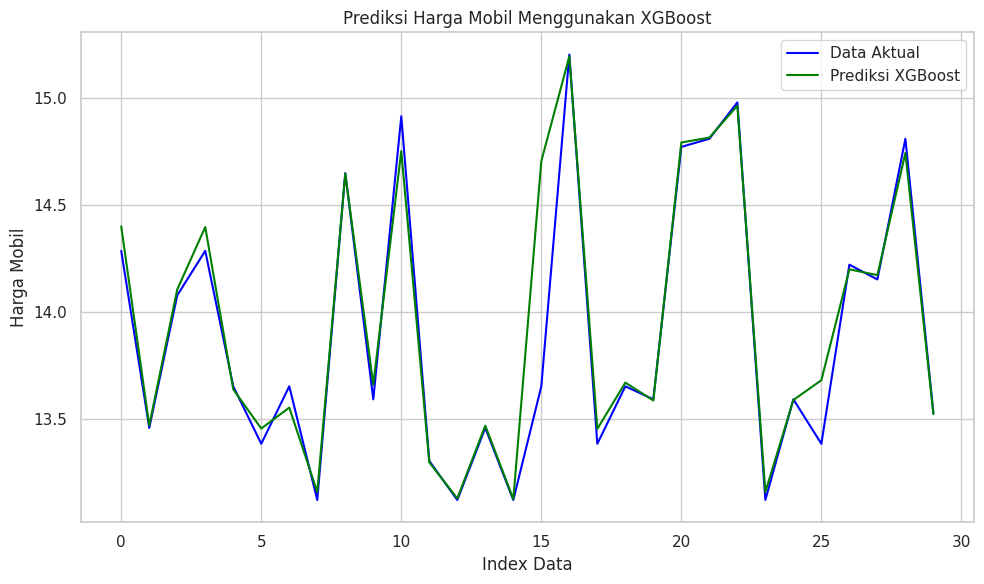

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
import time

from xgboost import XGBRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score, make_scorer
from sklearn.model_selection import train_test_split, KFold, cross_val_score

warnings.filterwarnings("ignore")

# ---------------------------
# 1. Preprocessing
# ---------------------------
def preprocess_data(df, target_col='Price', test_size=0.3):
    X = df.drop(columns=[target_col])
    y = df[target_col]

    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=test_size, random_state=42, shuffle=True
    )

    scaler_X = StandardScaler()
    X_train_scaled = scaler_X.fit_transform(X_train)
    X_test_scaled = scaler_X.transform(X_test)

    scaler_y = StandardScaler()
    y_train_scaled = scaler_y.fit_transform(y_train.values.reshape(-1, 1)).ravel()
    y_test_scaled = scaler_y.transform(y_test.values.reshape(-1, 1)).ravel()

    return X_train_scaled, X_test_scaled, y_train_scaled, y_test_scaled, scaler_y, y_test

# Catat waktu mulai
start_time = time.time()

# ---------------------------
# 2. Train XGBoost Model
# ---------------------------
def train_xgb_model(X_train, y_train, params=None):
    if params is None:
        params = {
            'n_estimators': 100,
            'learning_rate': 0.1,
            'max_depth': 4,
            'random_state': 42
        }
    model = XGBRegressor(**params)
    model.fit(X_train, y_train)
    return model

# ---------------------------
# 3. Cross Validation
# ---------------------------
def cross_validate_model(model, X, y, folds=5):
    kf = KFold(n_splits=folds, shuffle=True, random_state=42)
    scorer = make_scorer(mean_squared_error, greater_is_better=False)
    cv_scores = cross_val_score(model, X, y, cv=kf, scoring=scorer)
    print("Cross-Validation MSE (per fold):", -cv_scores)
    print("Average CV MSE:", -np.mean(cv_scores))

# ---------------------------
# 4. Evaluation
# ---------------------------
def evaluate_model(y_true_scaled, y_pred_scaled, scaler_y):
    y_true = scaler_y.inverse_transform(y_true_scaled.reshape(-1, 1))
    y_pred = scaler_y.inverse_transform(y_pred_scaled.reshape(-1, 1))

    mse = mean_squared_error(y_true, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_true, y_pred)

    print(f"Mean Squared Error (MSE): {mse:.4f}")
    print(f"Root Mean Squared Error (RMSE): {rmse:.4f}")
    print(f"R² Score: {r2:.4f}")

    return y_true, y_pred

# ---------------------------
# 5. Plotting
# ---------------------------
def plot_predictions(y_true, y_pred):
    plt.figure(figsize=(10,6))
    plt.plot(y_true, label='Data Aktual', color='blue')
    plt.plot(y_pred, label='Prediksi XGBoost', color='green')
    plt.title('Prediksi Harga Mobil Menggunakan XGBoost')
    plt.xlabel('Index Data')
    plt.ylabel('Harga Mobil')
    plt.legend()
    plt.tight_layout()
    plt.show()

# Catat waktu selesai
end_time = time.time()

# Hitung waktu pelatihan
training_time = end_time - start_time

# Tampilkan waktu pelatihan
print(f"Waktu pelatihan: {training_time:.4f} detik")

# ==============================
# MAIN PIPELINE
# ==============================

# Asumsikan df sudah tersedia
X_train_scaled, X_test_scaled, y_train_scaled, y_test_scaled, scaler_y, y_test_raw = preprocess_data(df)

# Train XGBoost Model
xgb_model = train_xgb_model(X_train_scaled, y_train_scaled)

# Cross-Validation
cross_validate_model(xgb_model, X_train_scaled, y_train_scaled)

# Prediction
y_pred_scaled = xgb_model.predict(X_test_scaled)

# Prediksi untuk data train
y_train_pred_scaled = xgb_model.predict(X_train_scaled)

# R-squared untuk data train
r2_train = r2_score(y_train_scaled, y_train_pred_scaled)
print(f"R-squared (Train): {r2_train:.4f}")

# R-squared untuk data test
r2_test = r2_score(y_test_scaled, y_pred_scaled)
print(f"R-squared (Test): {r2_test:.4f}")

# Evaluation
y_true, y_pred = evaluate_model(y_test_scaled, y_pred_scaled, scaler_y)

# Visualization
plot_predictions(y_true, y_pred)


Cross-Validation MSE (per fold): [0.07124228 0.18453856 0.04980757 0.07645769 0.04019352]
Average CV MSE: 0.0844479255480505
Mean Squared Error (MSE): 0.0592
Root Mean Squared Error (RMSE): 0.2433
R² Score: 0.8518
R-squared (Train): 0.9934
R-squared (Test): 0.8518


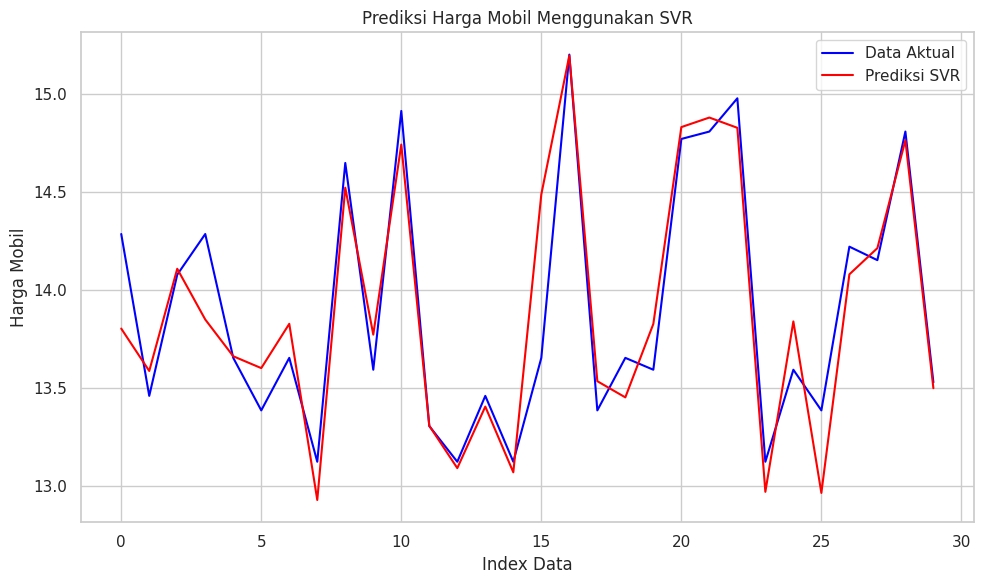

In [ ]:
import pandas as pd
import numpy as np
from sklearn.svm import SVR
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score, make_scorer
from sklearn.model_selection import train_test_split, KFold, cross_val_score
import matplotlib.pyplot as plt
import warnings

warnings.filterwarnings("ignore")

# ---------------------------
# 1. Preprocessing Function
# ---------------------------
def preprocess_data(df, target_col='Price', test_size=0.3):
    X = df.drop(columns=[target_col])
    y = df[target_col]

    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=test_size, random_state=42, shuffle=True
    )

    scaler_X = StandardScaler()
    X_train_scaled = scaler_X.fit_transform(X_train)
    X_test_scaled = scaler_X.transform(X_test)

    scaler_y = StandardScaler()
    y_train_scaled = scaler_y.fit_transform(y_train.values.reshape(-1, 1)).ravel()
    y_test_scaled = scaler_y.transform(y_test.values.reshape(-1, 1)).ravel()

    return X_train_scaled, X_test_scaled, y_train_scaled, y_test_scaled, scaler_y, y_test

# ---------------------------
# 2. Model Training Function
# ---------------------------
def train_svr_model(X_train, y_train, C=1000, gamma=0.01, epsilon=0.1):
    svr = SVR(kernel='rbf', C=C, gamma=gamma, epsilon=epsilon)
    svr.fit(X_train, y_train)
    return svr

# ---------------------------
# 3. Cross Validation (K-Fold)
# ---------------------------
def cross_validate_model(model, X, y, folds=5):
    kf = KFold(n_splits=folds, shuffle=True, random_state=42)
    scorer = make_scorer(mean_squared_error, greater_is_better=False)
    cv_scores = cross_val_score(model, X, y, cv=kf, scoring=scorer)
    print("Cross-Validation MSE (per fold):", -cv_scores)
    print("Average CV MSE:", -np.mean(cv_scores))

# ---------------------------
# 4. Evaluation Function
# ---------------------------
def evaluate_model(y_true_scaled, y_pred_scaled, scaler_y):
    y_true = scaler_y.inverse_transform(y_true_scaled.reshape(-1, 1))
    y_pred = scaler_y.inverse_transform(y_pred_scaled.reshape(-1, 1))

    mse = mean_squared_error(y_true, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_true, y_pred)

    print(f"Mean Squared Error (MSE): {mse:.4f}")
    print(f"Root Mean Squared Error (RMSE): {rmse:.4f}")
    print(f"R² Score: {r2:.4f}")

    return y_true, y_pred

# ---------------------------
# 5. Visualization
# ---------------------------
def plot_predictions(y_true, y_pred):
    plt.figure(figsize=(10,6))
    plt.plot(y_true, label='Data Aktual', color='blue')
    plt.plot(y_pred, label='Prediksi SVR', color='red')
    plt.title('Prediksi Harga Mobil Menggunakan SVR')
    plt.xlabel('Index Data')
    plt.ylabel('Harga Mobil')
    plt.legend()
    plt.tight_layout()
    plt.show()

# ==============================
# MAIN PIPELINE
# ==============================

# Asumsikan df sudah tersedia
X_train_scaled, X_test_scaled, y_train_scaled, y_test_scaled, scaler_y, y_test_raw = preprocess_data(df)

# Model Training
svr_model = train_svr_model(X_train_scaled, y_train_scaled)

# Cross-Validation (K-Fold)
cross_validate_model(svr_model, X_train_scaled, y_train_scaled)

# Prediksi untuk data train
y_train_pred_scaled = svr_model.predict(X_train_scaled)

# Prediction
y_pred_scaled = svr_model.predict(X_test_scaled)

# Evaluation
y_true, y_pred = evaluate_model(y_test_scaled, y_pred_scaled, scaler_y)

# R-squared untuk data train
r2_train = r2_score(y_train_scaled, y_train_pred_scaled)
print(f"R-squared (Train): {r2_train:.4f}")

# R-squared untuk data test
r2_test = r2_score(y_test_scaled, y_pred_scaled)
print(f"R-squared (Test): {r2_test:.4f}")

# Plot
plot_predictions(y_true, y_pred)


Model | Akurasi | Interpretasi | Kecepatan | Kelebihan Utama

Linear Regression | ❗️Cukup | ✅ Mudah | ✅ Cepat | Sangat mudah dipahami

Random Forest | ✅ Bagus | ⚠️ Sedang | ⚠️ Sedang | Robust, tangkap non-linearitas

SVR | ⚠️ Bagus | ⚠️ Sulit | ❌ Lambat | Presisi tinggi, cocok dataset kecil

XGBoost | ✅⚡ Sangat Bagus | ❌ Sulit | ⚠️ Sedang | Performa kompetisi, sangat powerful